In [74]:
import pandas as pd
import numpy as np

# 数据导入与预处理

In [75]:
# Load the file to inspect its content
file_path = r'D:\xjtufiles\3ee\DGA\datasets\DGA_data_all.csv'
df = pd.read_csv(file_path)

# df = pd.read_csv(r'D:\xjtufiles\3ee\DGA_data_pre.csv', index_col = 0)
df = df.iloc[:-1,:]
# df

df['h2'] = pd.to_numeric(df['h2'],errors='coerce')
df['ch4'] = pd.to_numeric(df['ch4'],errors='coerce')
df['c2h6'] = pd.to_numeric(df['c2h6'],errors='coerce')
df['c2h4'] = pd.to_numeric(df['c2h4'],errors='coerce')
df['c2h2'] = pd.to_numeric(df['c2h2'],errors='coerce')
df['act'] = pd.to_numeric(df['act'],errors='coerce')

df = df.reset_index(drop=True) # 重置索引

In [76]:
df

h2     ch4    c2h6    c2h4    c2h2  act
0      294.00   27.40   5.600   52.60  338.00    1
1      200.83   59.45  41.000   40.48  150.84    1
2       71.60   20.20   2.700   34.60   44.20    1
3       29.30   24.90   7.300   11.40    7.50    1
4     1170.00  255.00  18.000  312.00  325.00    1
...       ...     ...     ...     ...     ...  ...
1993   160.00   10.00   3.000    1.00    1.00    3
1994    56.00   61.00  75.000   32.00   31.00    3
1995   217.00  286.00  14.000  458.00  884.00    1
1996   441.00  207.00  43.000  224.00  261.00    1
1997   127.00   24.00   0.001   32.00   81.00    1

[1998 rows x 6 columns]

In [77]:
# 查看数据信息
# print(df.info())

# 查看缺失值
print(df.isnull().sum())

h2      0
ch4     0
c2h6    0
c2h4    0
c2h2    0
act     0
dtype: int64


In [78]:
print(df['act'].nunique(dropna=True)) # 显示类别数量

6


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
# 假设 df 是你的 DataFrame
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

In [ ]:
def remove_outliers_iqr(df, columns):
    """使用 IQR 方法移除离群值"""
    df_cleaned = df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 5 * IQR
            upper_bound = Q3 + 5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# 指定特征列
feature_cols = ['h2', 'ch4', 'c2h6', 'c2h4', 'c2h2']

# 移除离群值
df_cleaned = remove_outliers_iqr(df, feature_cols)

print("离群值处理后数据形状：", df_cleaned.shape)

离群值处理后数据形状： (1596, 6)


In [ ]:
# 确保特征列为数值类型
for col in feature_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# 确保目标列为整数类型
df_cleaned['act'] = df_cleaned['act'].astype(int)

print(df_cleaned.dtypes)

h2      float64
ch4     float64
c2h6    float64
c2h4    float64
c2h2    float64
act       int32
dtype: object


## 原始数据可视化

C:\Users\11094\AppData\Local\Temp\ipykernel_33944\2781421250.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'), #设置图例边框与柱子一致
C:\Users\11094\AppData\Local\Temp\ipykernel_33944\2781421250.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本') #设置图例边框与柱子一致


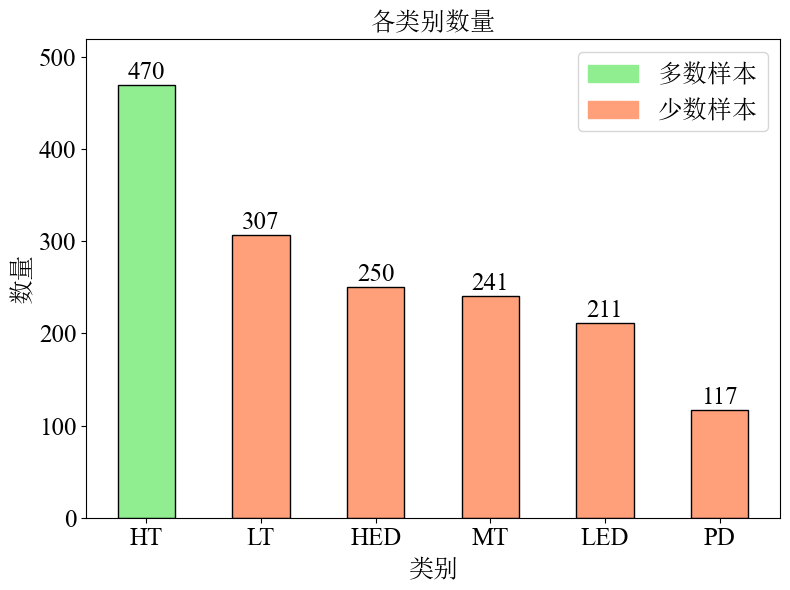

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

# 假设 df 是你的 DataFrame

act_counts = df_cleaned['act'].value_counts()  # 计算每个类别的数量

font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 替换索引
act_counts.index = act_counts.index.map(category_mapping)

# 设置柱子颜色列表
colors = ['lightgreen', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon'] # 设定每个柱子的颜色

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
bars = plt.bar(act_counts.index, act_counts.values, color=colors, edgecolor='black', linewidth=1, width=0.5)  # 绘制柱状图，设置颜色、边框和宽度

plt.title('各类别数量', fontproperties=font_cn)  # 设置标题
plt.xlabel('类别', fontproperties=font_cn)  # 设置 x 轴标签
plt.ylabel('数量', fontproperties=font_cn)  # 设置 y 轴标签
plt.xticks(rotation=0, ha='center', fontproperties=font_en)  # 旋转 x 轴刻度标签，使其居中
plt.yticks(fontproperties=font_en)  # 设置 y 轴字体

# 在柱子上方显示样本数量
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontproperties=font_en)

# 添加样例图示
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'), #设置图例边框与柱子一致
    plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本') #设置图例边框与柱子一致
]
plt.legend(handles=legend_elements, loc='upper right', prop=font_cn)  # 添加图例，设置位置和字体

plt.ylim(0, max(act_counts.values) + 50) # 设置纵轴范围，+5是为了让最高柱子上方有空间

plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()  # 显示图形

C:\Users\11094\AppData\Local\Temp\ipykernel_33944\2313638102.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'),
C:\Users\11094\AppData\Local\Temp\ipykernel_33944\2313638102.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本')


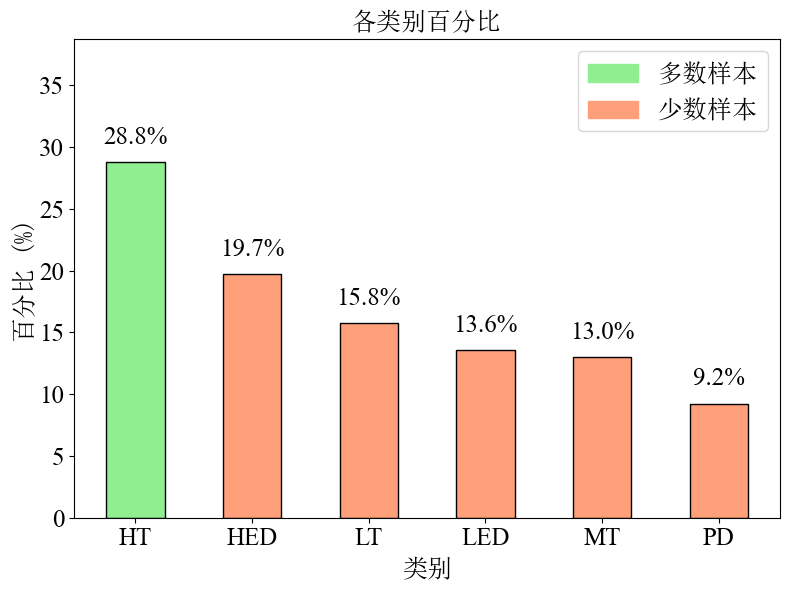

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd

# 假设 df 是你的 DataFrame

act_percentages = df['act'].value_counts(normalize=True) * 100  # 计算每个类别的百分比

font_cn = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=18)  # 设置字体路径和大小
font_en = FontProperties(fname=r"C:\Windows\Fonts\times.ttf", size=18)  # 设置字体路径和大小

# 创建类别映射字典
category_mapping = {
    1: 'HED',
    2: 'HT',
    3: 'LED',
    4: 'LT',
    5: 'MT',
    6: 'PD'
}

# 替换索引
act_percentages.index = act_percentages.index.map(category_mapping)

# 设置柱子颜色列表
colors = ['lightgreen', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon', 'lightsalmon']

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
bars = plt.bar(act_percentages.index, act_percentages.values, color=colors, edgecolor='black', linewidth=1, width=0.5)  # 绘制柱状图，设置颜色、边框和宽度

plt.title('各类别百分比', fontproperties=font_cn)  # 设置标题
plt.xlabel('类别', fontproperties=font_cn)  # 设置 x 轴标签
plt.ylabel('百分比 (%)', fontproperties=font_cn)  # 设置 y 轴标签
plt.xticks(rotation=0, ha='center', fontproperties=font_en)  # 旋转 x 轴刻度标签，使其居中
plt.yticks(fontproperties=font_en)  # 设置 y 轴字体

# 在柱子上方显示百分比
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontproperties=font_en)  # 显示百分比，保留一位小数

# 添加样例图示
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', edgecolor='black', linewidth=1, label='多数样本'),
    plt.Rectangle((0, 0), 1, 1, color='lightsalmon', edgecolor='black', linewidth=1, label='少数样本')
]
plt.legend(handles=legend_elements, loc='upper right', prop=font_cn)  # 添加图例，设置位置和字体

plt.ylim(0, max(act_percentages.values) + 10)  # 设置纵轴范围，+10是为了让最高柱子上方有空间

plt.tight_layout()  # 自动调整子图参数，使图形更紧凑
plt.show()  # 显示图形

## Xy分割

In [ ]:
X = df_cleaned.iloc[:, :5]
y = df_cleaned.iloc[:, -1]

In [ ]:
X

h2     ch4    c2h6    c2h4     c2h2
1     200.83   59.45  41.000   40.48  150.840
2      71.60   20.20   2.700   34.60   44.200
3      29.30   24.90   7.300   11.40    7.500
5     255.00   48.00   8.300   33.00   29.800
6     138.50   68.40   0.000  193.60  137.000
...      ...     ...     ...     ...      ...
1986  124.00  166.00  87.000   59.00    0.001
1992  240.00   20.00   5.000   28.00   96.000
1993  160.00   10.00   3.000    1.00    1.000
1994   56.00   61.00  75.000   32.00   31.000
1997  127.00   24.00   0.001   32.00   81.000

[1596 rows x 5 columns]

# 未添加新特征

## 划分训练集和测试集

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

## KNN  83.125%

In [ ]:
# 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[18  2  4  0  0  2]
 [ 0 52  3  1  1  0]
 [ 4  0 17  0  0  0]
 [ 0  3  1 23  2  0]
 [ 0  0  0  0 14  0]
 [ 0  0  4  0  0  9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.69      0.75        26
           2       0.91      0.91      0.91        57
           3       0.59      0.81      0.68        21
           4       0.96      0.79      0.87        29
           5       0.82      1.00      0.90        14
           6       0.82      0.69      0.75        13

    accuracy                           0.83       160
   macro avg       0.82      0.82      0.81       160
weighted avg       0.85      0.83      0.83       160

Accuracy: 0.83125


C:\Users\11094\AppData\Local\Temp\ipykernel_33944\4211151980.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])


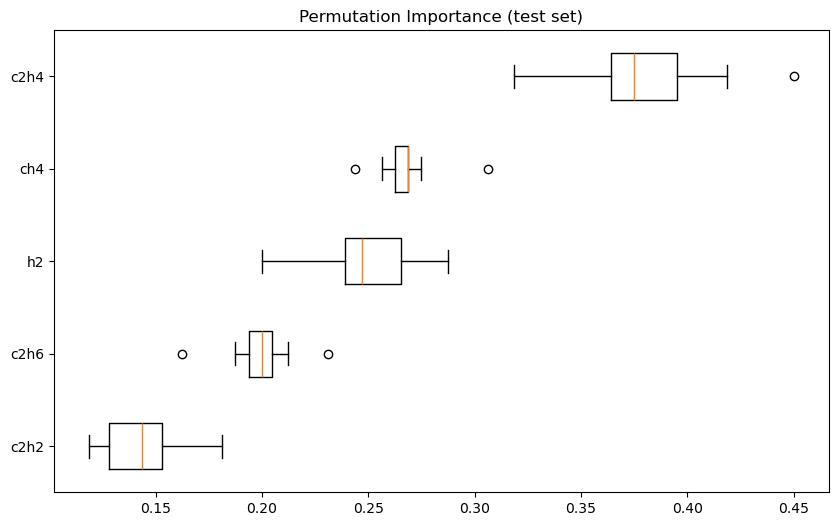

c2h2: 0.1431
c2h6: 0.1988
h2: 0.2494
ch4: 0.2681
c2h4: 0.3806


In [ ]:
# 导入permutation_importance
from sklearn.inspection import permutation_importance
result = permutation_importance(classifier, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

## 标准化数据KNN 85.00%

通常情况下，训练数据和测试数据的标准化应该使用相同的均值和标准差。因此，标准化测试数据时应使用 scaler.transform(X_test) 而不是 scaler.fit_transform(X_test)。这样可以确保训练数据和测试数据使用相同的标准化参数。

Accuracy: 85.00%


C:\Users\11094\AppData\Local\Temp\ipykernel_33944\3180789238.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])


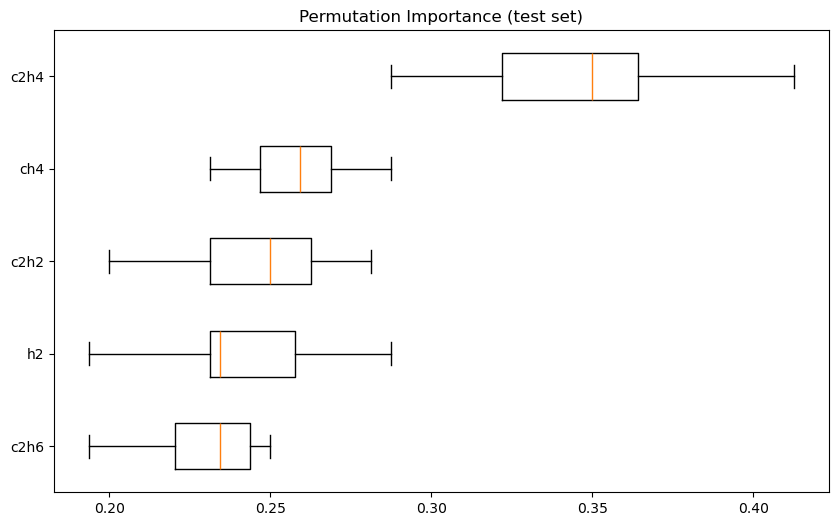

c2h6: 0.2294
h2: 0.2394
c2h2: 0.2431
ch4: 0.2587
c2h4: 0.3438


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ts = scaler.fit_transform(X_train)
X_tes = scaler.transform(X_test)
classifier.fit(X_ts,y_train)

y_tes = classifier.predict(X_tes)

accuracy = accuracy_score(y_tes,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 置换重要性
result = permutation_importance(classifier, X_tes, y_test, n_repeats=10, random_state=42)

# 排序特征重要性
sorted_idx = result.importances_mean.argsort()

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

# 打印特征重要性
for i in sorted_idx:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.4f}")

## XGBClassifier 89.38%

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=700,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=8,
 scale_pos_weight=2,
 seed=27)


### [1,6]->[0,5]

In [ ]:
y_train = y_train - 1
y_test = y_test - 1

In [ ]:
xgb1.fit(X_train,y_train)

preds = xgb1.predict(X_test) # 输出类别
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,y_test) # 计算准确率
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\11094\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [00:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 89.38%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, preds)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,preds)
print("Accuracy:",result2)

Confusion Matrix:
[[23  0  3  0  0  0]
 [ 0 55  2  0  0  0]
 [ 5  0 16  0  0  0]
 [ 0  3  0 25  1  0]
 [ 0  0  0  0 14  0]
 [ 0  0  3  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        26
           1       0.95      0.96      0.96        57
           2       0.67      0.76      0.71        21
           3       1.00      0.86      0.93        29
           4       0.93      1.00      0.97        14
           5       1.00      0.77      0.87        13

    accuracy                           0.89       160
   macro avg       0.89      0.87      0.88       160
weighted avg       0.90      0.89      0.90       160

Accuracy: 0.89375


### 特征重要性（Feature Importance）

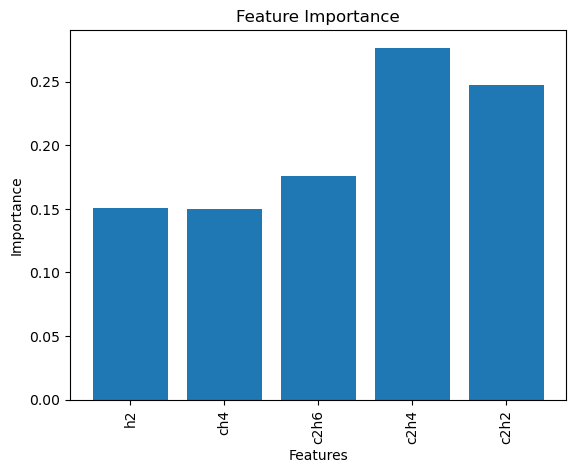

h2: 0.1505
ch4: 0.1498
c2h6: 0.1760
c2h4: 0.2767
c2h2: 0.2470


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 xgb1, X_train, y_train, X_test, y_test 已经定义

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation='vertical') # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

### 置换重要性（Permutation Importance）

C:\Users\11094\AppData\Local\Temp\ipykernel_33944\282421723.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])


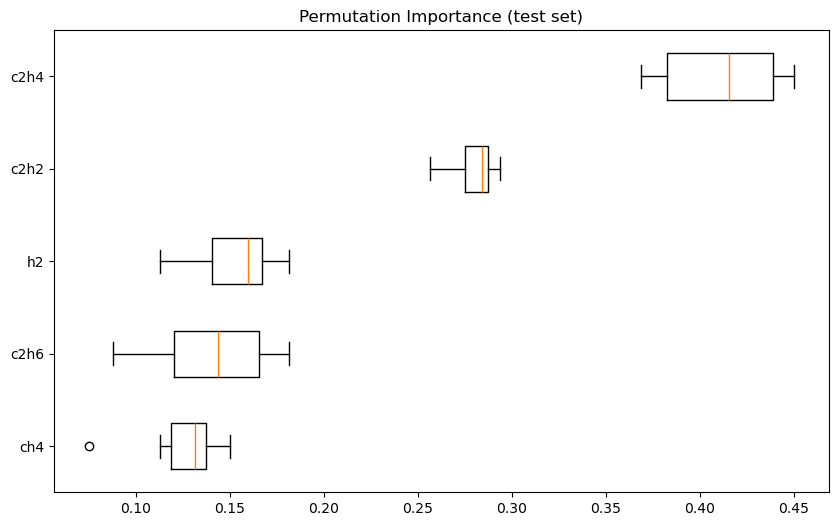

ch4: 0.1263
c2h6: 0.1425
h2: 0.1531
c2h2: 0.2794
c2h4: 0.4113


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb1, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.4f}")

## 随机森林 91.25%

Accuracy: 89.38%


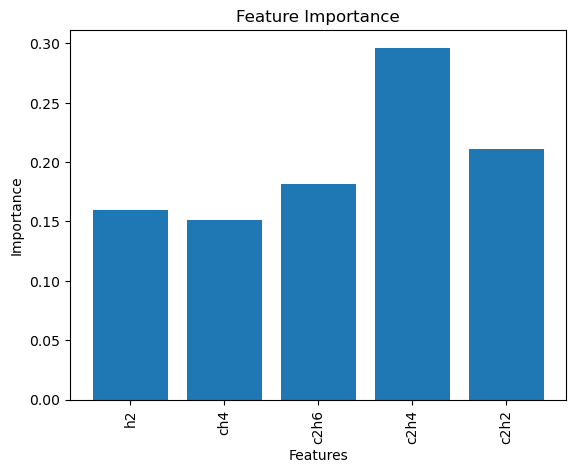

h2: 0.1599
ch4: 0.1513
c2h6: 0.1813
c2h4: 0.2964
c2h2: 0.2111


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经定义

clf = RandomForestClassifier(max_depth=9, random_state=42)

clf.fit(X_train, y_train)

y_t = clf.predict(X_test)
accuracy = accuracy_score(y_t, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 获取特征重要性
importance = clf.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_train.columns, rotation='vertical')  # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

In [ ]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    y_t = clf.predict(X_test)
    accuracy = accuracy_score(y_t,y_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy * 100.0))
    
# 通过循环，我们可以看到当 max_depth=13 时，准确率最高
# 该循环是为了找到最佳的 max_depth 参数值，即模型的最佳深度
# 模型深度指的是树的最大深度，即树的最大层数  

Depth: 1, Accuracy: 56.88%
Depth: 2, Accuracy: 58.13%
Depth: 3, Accuracy: 72.50%
Depth: 4, Accuracy: 72.50%
Depth: 5, Accuracy: 77.50%
Depth: 6, Accuracy: 83.12%
Depth: 7, Accuracy: 86.25%
Depth: 8, Accuracy: 89.38%
Depth: 9, Accuracy: 89.38%
Depth: 10, Accuracy: 90.62%
Depth: 11, Accuracy: 91.25%
Depth: 12, Accuracy: 90.62%
Depth: 13, Accuracy: 90.62%
Depth: 14, Accuracy: 89.38%
Depth: 15, Accuracy: 90.00%
Depth: 16, Accuracy: 89.38%
Depth: 17, Accuracy: 89.38%
Depth: 18, Accuracy: 89.38%
Depth: 19, Accuracy: 89.38%


In [85]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 创建一个包含 SMOTE 和 RandomForestClassifier 的管道
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=6)),
    ('classifier', RandomForestClassifier(max_depth=11, random_state=42))
])

# 训练模型
pipeline.fit(X_train, y_train)

# 预测测试集
y_t = pipeline.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_t, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.62%


In [86]:
y_train_t = pipeline.predict(X_train)
accuracy_in_train = accuracy_score(y_train_t, y_train)
print("Accuracy: %.2f%%" % (accuracy_in_train * 100.0))

Accuracy: 97.91%


In [88]:
# 测试SMOTE的k_neighbors从1到10，以及随机森林深度从1到20的结果
for k in range(1, 11):
    for depth in range(1, 21):
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=42, k_neighbors=k)),
            ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))
        ])
        
        # 训练模型
        pipeline.fit(X_train, y_train)
        
        # 预测测试集
        y_t = pipeline.predict(X_test)
        
        # 计算准确率
        accuracy = accuracy_score(y_t, y_test)
        print("k_neighbors: %d, Depth: %d, Accuracy: %.2f%%" % (k, depth, accuracy * 100.0))

k_neighbors: 1, Depth: 1, Accuracy: 45.62%
k_neighbors: 1, Depth: 2, Accuracy: 52.50%
k_neighbors: 1, Depth: 3, Accuracy: 63.75%
k_neighbors: 1, Depth: 4, Accuracy: 70.62%
k_neighbors: 1, Depth: 5, Accuracy: 74.38%
k_neighbors: 1, Depth: 6, Accuracy: 81.25%
k_neighbors: 1, Depth: 7, Accuracy: 83.75%
k_neighbors: 1, Depth: 8, Accuracy: 86.25%
k_neighbors: 1, Depth: 9, Accuracy: 86.88%
k_neighbors: 1, Depth: 10, Accuracy: 87.50%
k_neighbors: 1, Depth: 11, Accuracy: 87.50%
k_neighbors: 1, Depth: 12, Accuracy: 88.12%
k_neighbors: 1, Depth: 13, Accuracy: 88.75%
k_neighbors: 1, Depth: 14, Accuracy: 88.75%
k_neighbors: 1, Depth: 15, Accuracy: 88.75%
k_neighbors: 1, Depth: 16, Accuracy: 88.75%
k_neighbors: 1, Depth: 17, Accuracy: 88.75%
k_neighbors: 1, Depth: 18, Accuracy: 88.75%
k_neighbors: 1, Depth: 19, Accuracy: 88.75%
k_neighbors: 1, Depth: 20, Accuracy: 88.75%
k_neighbors: 2, Depth: 1, Accuracy: 46.88%
k_neighbors: 2, Depth: 2, Accuracy: 53.12%
k_neighbors: 2, Depth: 3, Accuracy: 63.75%


In [ ]:
import matplotlib.pyplot as plt

def plot_all_accuracies(filename="RFC_SMOTE_all_cleaned_original.txt"):
    """
    将所有 k_neighbors 对应的准确率折线图绘制在同一张图上。

    Args:
        filename (str): 文件名。
    """

    data = {}
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                k_neighbors, depth, accuracy = line.split(", ")
                k_neighbors = int(k_neighbors.split(": ")[1])
                depth = int(depth.split(": ")[1])
                accuracy = float(accuracy.split(": ")[1].replace("%", ""))

                if k_neighbors not in data:
                    data[k_neighbors] = {"depths": [], "accuracies": []}

                data[k_neighbors]["depths"].append(depth)
                data[k_neighbors]["accuracies"].append(accuracy)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap("tab10").colors  # 使用 tab10 色彩映射获取 10 种颜色

    for i, (k, values) in enumerate(data.items()):
        plt.plot(values["depths"], values["accuracies"], marker='o', label=f"k_neighbors = {k}", color=colors[i])

    plt.title("Accuracy vs. Depth for Different k_neighbors")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.legend()  # 添加图例
    plt.xticks(list(range(1, 21)))  # 设置 x 轴刻度为 1 到 20
    plt.tight_layout()
    plt.show()

# 调用函数绘制折线图
plot_all_accuracies()

# 三比值法：C2H2/C2H4,CH4/H2,C2H6/CH4,C2H4/C2H6

## 三比值特征生成

In [ ]:
# 示例：使用SMOTE + XGBoost
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

X_trinomial = X.copy()

# 生成三比值特征 h2	ch4	c2h6 c2h4 c2h2
X_trinomial['ch4/h2'] = X['ch4'] / (X['h2'] + 1e-6)  # 比值1为 CH4 与 H2 的比值
X_trinomial['c2h6/ch4'] = X['c2h6'] / (X['ch4'] + 1e-6) # 比值2为 C2H6 与 CH4 的比值
X_trinomial['c2h4/c2h6'] = X['c2h4'] / (X['c2h6'] + 1e-6) # 比值3为 C2H4 与 C2H6 的比值
X_trinomial['c2h2/c2h4'] = X['c2h2'] / (X['c2h4'] + 1e-6) # 比值4为 C2H2 与 C2H4 的比值

X_trinomial

h2     ch4    c2h6    c2h4     c2h2    ch4/h2  c2h6/ch4  \
1     200.83   59.45  41.000   40.48  150.840  0.296022  0.689655   
2      71.60   20.20   2.700   34.60   44.200  0.282123  0.133663   
3      29.30   24.90   7.300   11.40    7.500  0.849829  0.293173   
5     255.00   48.00   8.300   33.00   29.800  0.188235  0.172917   
6     138.50   68.40   0.000  193.60  137.000  0.493863  0.000000   
...      ...     ...     ...     ...      ...       ...       ...   
1986  124.00  166.00  87.000   59.00    0.001  1.338710  0.524096   
1992  240.00   20.00   5.000   28.00   96.000  0.083333  0.250000   
1993  160.00   10.00   3.000    1.00    1.000  0.062500  0.300000   
1994   56.00   61.00  75.000   32.00   31.000  1.089286  1.229508   
1997  127.00   24.00   0.001   32.00   81.000  0.188976  0.000042   

         c2h4/c2h6  c2h2/c2h4  
1     9.873170e-01   3.726284  
2     1.281481e+01   1.277457  
3     1.561644e+00   0.657895  
5     3.975903e+00   0.903030  
6     1.936000e+08   0.707645  
...            ...        ...  
1986  6.781609e-01   0.000017  
1992  5.599999e+00   3.428571  
1993  3.333332e-01   0.999999  
1994  4.266667e-01   0.968750  
1997  3.196803e+04   2.531250  

[1596 rows x 9 columns]

## 划分训练集与测试集

In [ ]:
from sklearn.model_selection import train_test_split

# 假设 X 和 y 是你的特征和目标变量
X_trinomial_train, X_trinomial_test, y_trinomial_train, y_trinomial_test = train_test_split(X_trinomial, y, test_size=0.2, random_state=42) #test_size=0.2 代表测试集占百分之20

In [ ]:
y_trinomial_train = y_trinomial_train - 1
y_trinomial_test = y_trinomial_test - 1

In [ ]:
y_trinomial_train

1899    1
943     3
596     1
1645    4
1266    4
       ..
1373    5
1577    3
1063    3
1841    0
1365    5
Name: act, Length: 1276, dtype: int32

## KNN 79.37%

In [ ]:
# 使用 KNN 进行分类
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)# n_neighbors=1 代表使用最近的一个邻居
classifier.fit(X_trinomial_train, y_trinomial_train)
y_trinomial_pred = classifier.predict(X_trinomial_test)

# 评估 KNN 模型
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_trinomial = confusion_matrix(y_trinomial_test, y_trinomial_pred)
print("Confusion Matrix:")
print(result_trinomial)
result1_trinomial = classification_report(y_trinomial_test, y_trinomial_pred)
print("Classification Report:",)
print (result1_trinomial)
result2_trinomial = accuracy_score(y_trinomial_test,y_trinomial_pred)
print("Accuracy:",result2_trinomial)

Confusion Matrix:
[[33  3  8  1  0  1]
 [ 3 90  6  3  4  0]
 [10  2 32  0  0  2]
 [ 0  4  2 49  4  1]
 [ 0  3  0  2 33  0]
 [ 1  1  4  1  0 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        46
           1       0.87      0.85      0.86       106
           2       0.62      0.70      0.65        46
           3       0.88      0.82      0.84        60
           4       0.80      0.87      0.84        38
           5       0.81      0.71      0.76        24

    accuracy                           0.79       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.80      0.79      0.80       320

Accuracy: 0.79375


C:\Users\11094\AppData\Local\Temp\ipykernel_33944\478257669.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result_trinomial.importances[sorted_idx_trinomial].T, vert=False, labels=X_trinomial_test.columns[sorted_idx_trinomial])


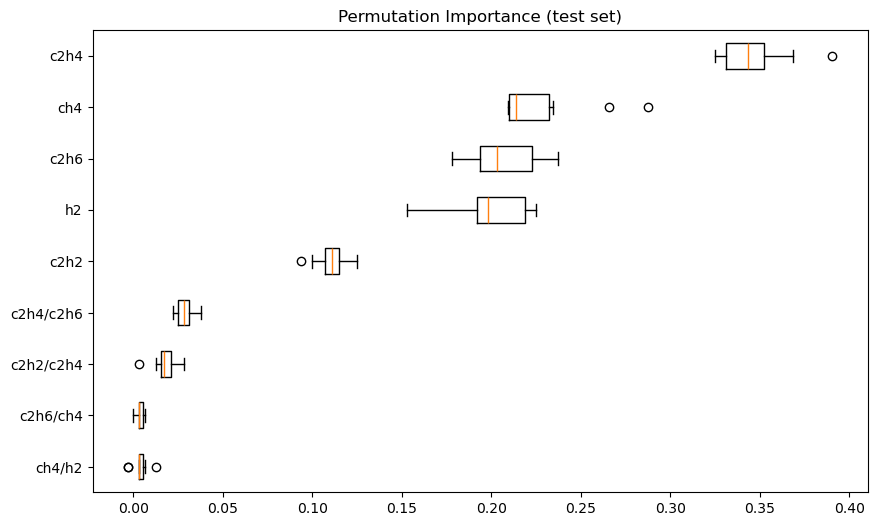

ch4/h2: 0.0034
c2h6/ch4: 0.0034
c2h2/c2h4: 0.0175
c2h4/c2h6: 0.0287
c2h2: 0.1106
h2: 0.2009
c2h6: 0.2075
ch4: 0.2281
c2h4: 0.3472


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_train, y_train, X_test, y_test 已经定义

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_trinomial_train, y_trinomial_train)

result_trinomial = permutation_importance(classifier, X_trinomial_test, y_trinomial_test, n_repeats=10, random_state=42)

sorted_idx_trinomial = result_trinomial.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result_trinomial.importances[sorted_idx_trinomial].T, vert=False, labels=X_trinomial_test.columns[sorted_idx_trinomial])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx_trinomial:
    print(f"{X_trinomial_train.columns[i]}: {result_trinomial.importances_mean[i]:.4f}")

## 标准化处理KNN 80.94%%

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trinomial_ts = scaler.fit_transform(X_trinomial_train)
X_trinomial_tes = scaler.transform(X_trinomial_test)
X_trinomial_tes

array([[-0.67445108,  0.21108965,  0.38035003, ..., -0.04138908,
        -0.05808767, -0.03042681],
       [ 0.68985765, -0.744338  , -0.67575402, ..., -0.04109792,
        -0.05808784, -0.03042681],
       [ 6.22688909, -0.2820343 , -0.07742401, ..., -0.04111249,
        -0.05808784, -0.03042681],
       ...,
       [-0.57911895, -0.10106413, -0.26698114, ..., -0.04202495,
        -0.05808746, -0.03042681],
       [-0.51980118,  0.52640449,  0.40614012, ..., -0.04177684,
        -0.05808763, -0.03042681],
       [-0.46472039, -0.81546165, -0.80728346, ..., -0.04254891,
        -0.05808696, -0.03042571]])

Accuracy: 80.94%


C:\Users\11094\AppData\Local\Temp\ipykernel_33944\1166514355.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result_trinomial.importances[sorted_idx_trinomial].T, vert=False, labels=X_trinomial_test.columns[sorted_idx_trinomial])


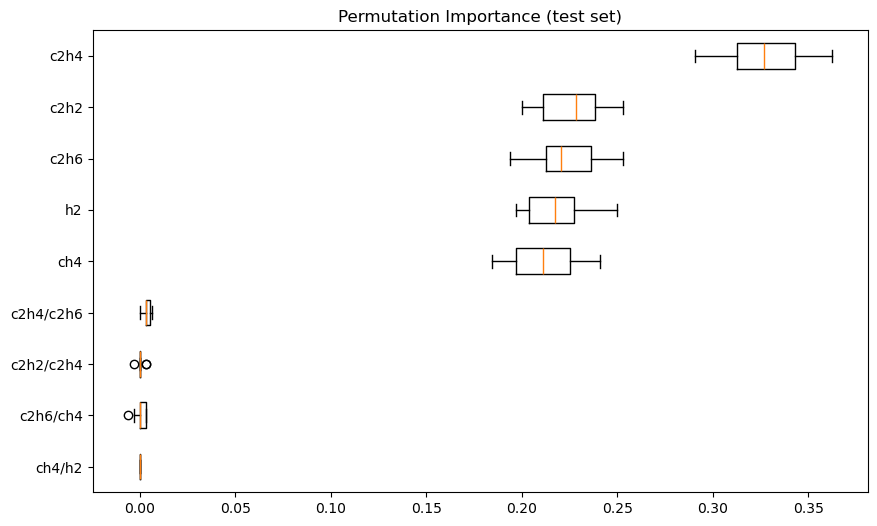

ch4/h2: 0.0000
c2h6/ch4: 0.0003
c2h2/c2h4: 0.0003
c2h4/c2h6: 0.0034
ch4: 0.2109
h2: 0.2187
c2h6: 0.2216
c2h2: 0.2250
c2h4: 0.3262


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_trinomial_ts,y_trinomial_train)

y_trinomial_tes = classifier.predict(X_trinomial_tes)

accuracy_trinomial = accuracy_score(y_trinomial_tes,y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy_trinomial * 100.0))

# 置换重要性
result_trinomial = permutation_importance(classifier, X_trinomial_tes, y_trinomial_test, n_repeats=10, random_state=42)

# 排序特征重要性
sorted_idx_trinomial = result_trinomial.importances_mean.argsort()

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.boxplot(result_trinomial.importances[sorted_idx_trinomial].T, vert=False, labels=X_trinomial_test.columns[sorted_idx_trinomial])
plt.title("Permutation Importance (test set)")
plt.show()

# 打印特征重要性
for i in sorted_idx_trinomial:
    print(f"{X_trinomial_test.columns[i]}: {result_trinomial.importances_mean[i]:.4f}")

## XGBClassifier 86.56%

In [ ]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=700,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=8,
 scale_pos_weight=2,
 seed=27)

In [ ]:
xgb1.fit(X_trinomial_train,y_trinomial_train)

preds_trinomial = xgb1.predict(X_trinomial_test) # 输出类别
from sklearn.metrics import accuracy_score
accuracy_trinomial = accuracy_score(preds_trinomial,y_trinomial_test) # 计算准确率
print("Accuracy: %.2f%%" % (accuracy_trinomial * 100.0))

C:\Users\11094\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [00:59:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 86.56%


In [ ]:
importance = xgb1.feature_importances_
importance

array([0.05761685, 0.05576427, 0.06022252, 0.11671158, 0.11974269,
       0.17085344, 0.0553439 , 0.2005562 , 0.16318858], dtype=float32)

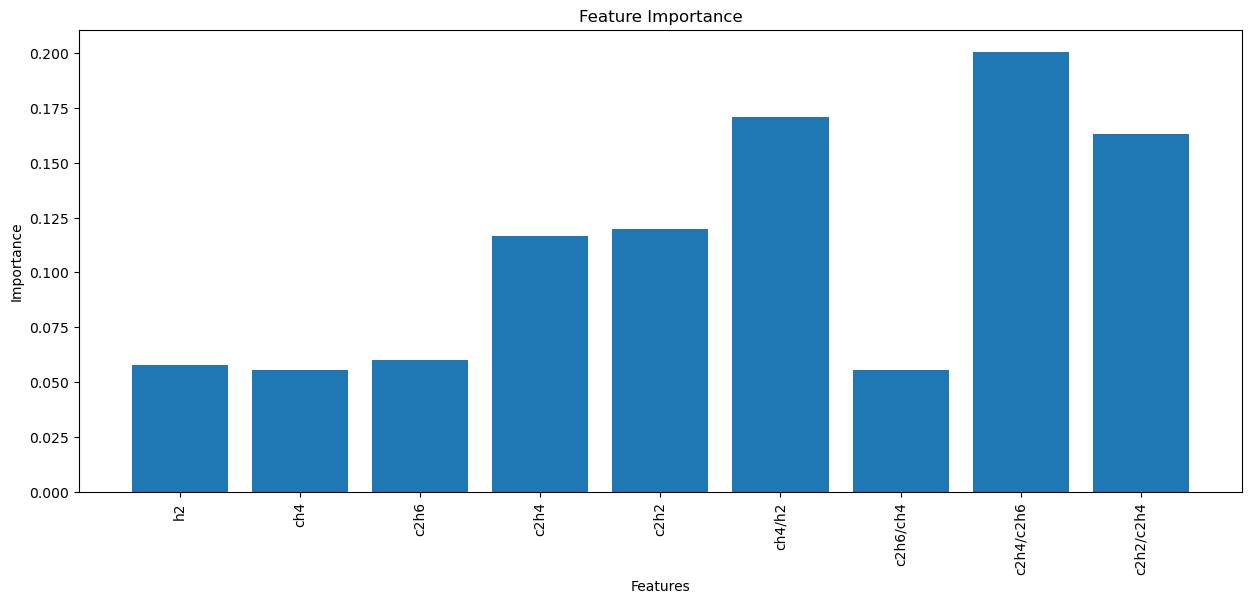

h2: 0.0576
ch4: 0.0558
c2h6: 0.0602
c2h4: 0.1167
c2h2: 0.1197
ch4/h2: 0.1709
c2h6/ch4: 0.0553
c2h4/c2h6: 0.2006
c2h2/c2h4: 0.1632


In [ ]:
# 特征重要性
import xgboost as xgb
import matplotlib.pyplot as plt

# 假设 xgb1, X_train, y_train, X_test, y_test 已经定义

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
# 设定图片尺寸
plt.figure(figsize=(15, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_trinomial_train.columns, rotation='vertical') # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_trinomial_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

C:\Users\11094\AppData\Local\Temp\ipykernel_33944\3918876089.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_trinomial_test.columns[sorted_idx])


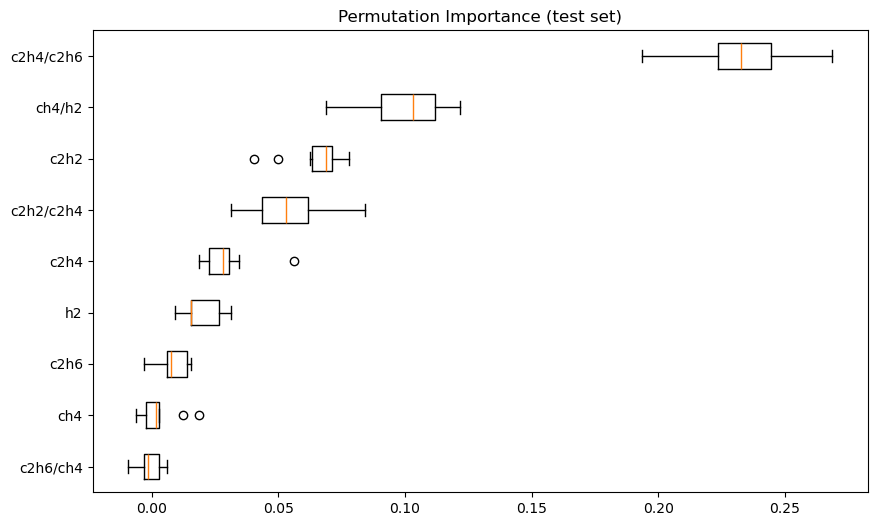

c2h6/ch4: -0.0013
ch4: 0.0025
c2h6: 0.0084
h2: 0.0194
c2h4: 0.0291
c2h2/c2h4: 0.0541
c2h2: 0.0647
ch4/h2: 0.1016
c2h4/c2h6: 0.2331


In [ ]:
# 置换重要性
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb1, X_trinomial_test, y_trinomial_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_trinomial_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_trinomial_train.columns[i]}: {result.importances_mean[i]:.4f}")

### SHAP

In [ ]:
import shap
import xgboost as xgb
import pandas as pd

# 假设您的模型是 xgb1，测试集是 X_trinomial_test

# 训练 SHAP 解释器
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X_trinomial_test)

# 打印 shap_values 的形状，以确认维度
print("shap_values shape:", shap_values.shape)


c:\Users\11094\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


shap_values shape: (320, 9, 6)


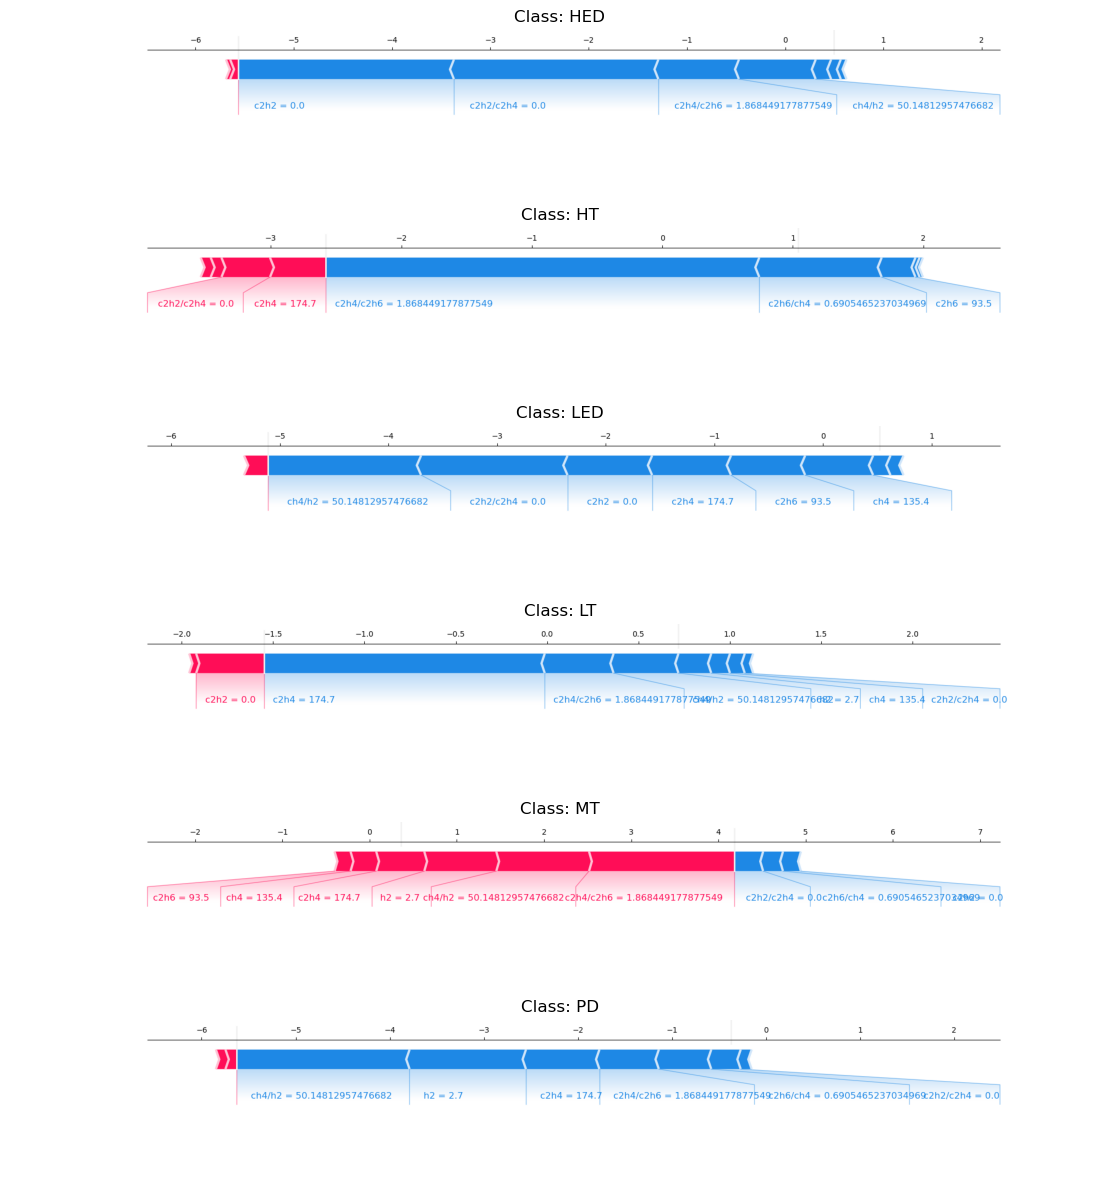

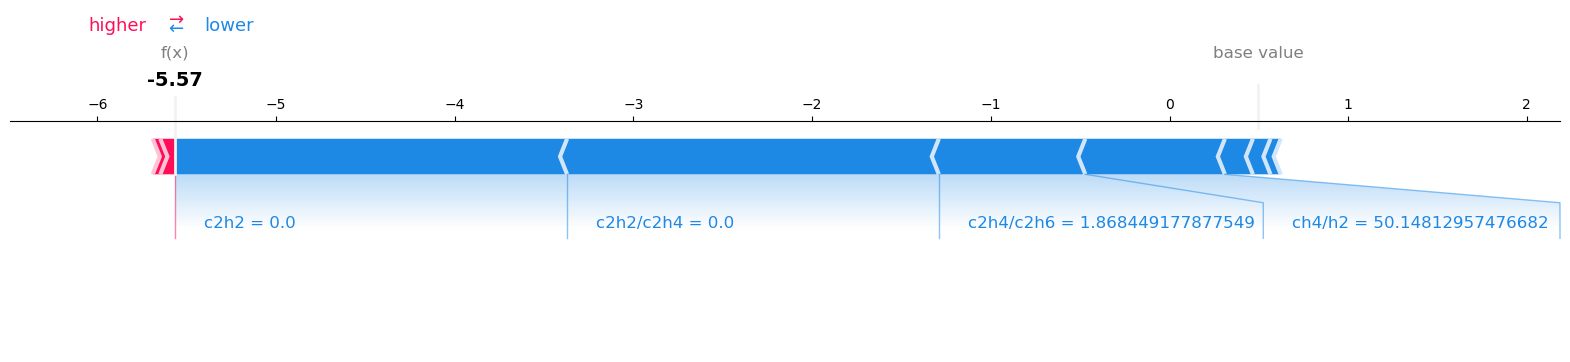

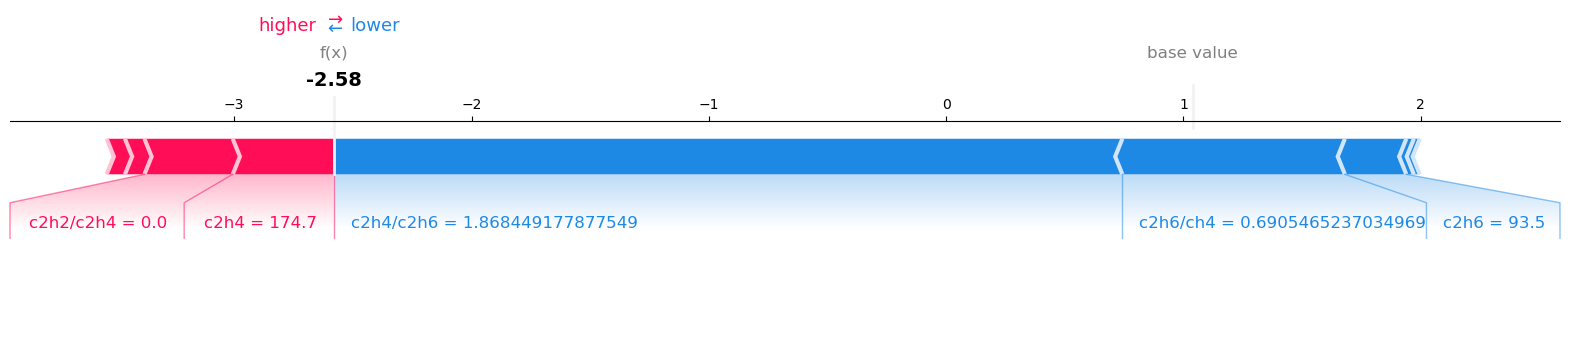

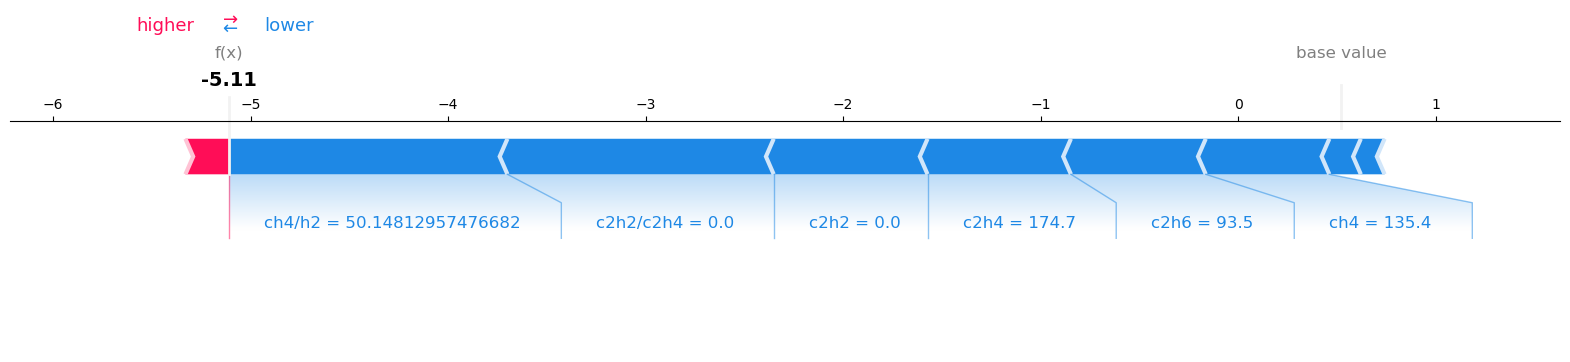

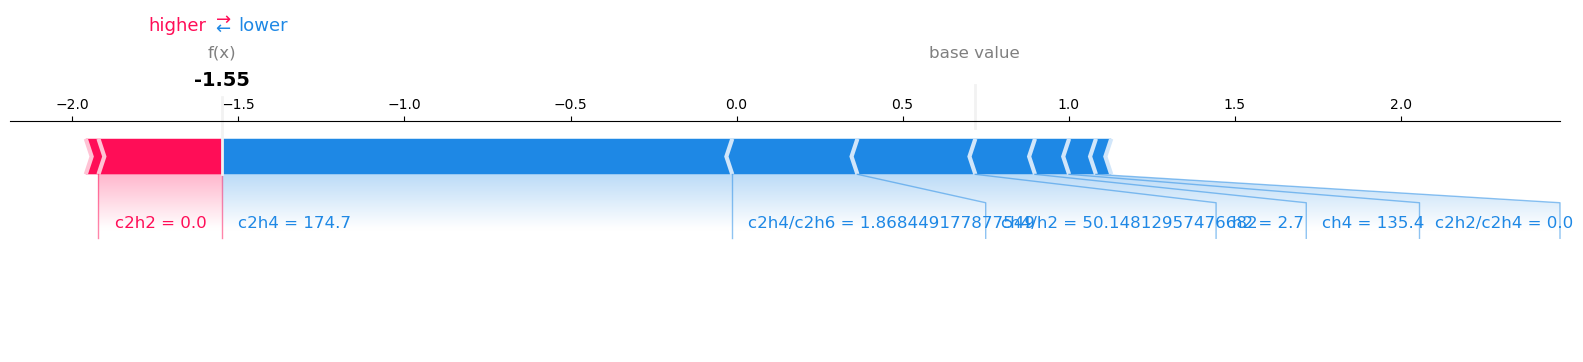

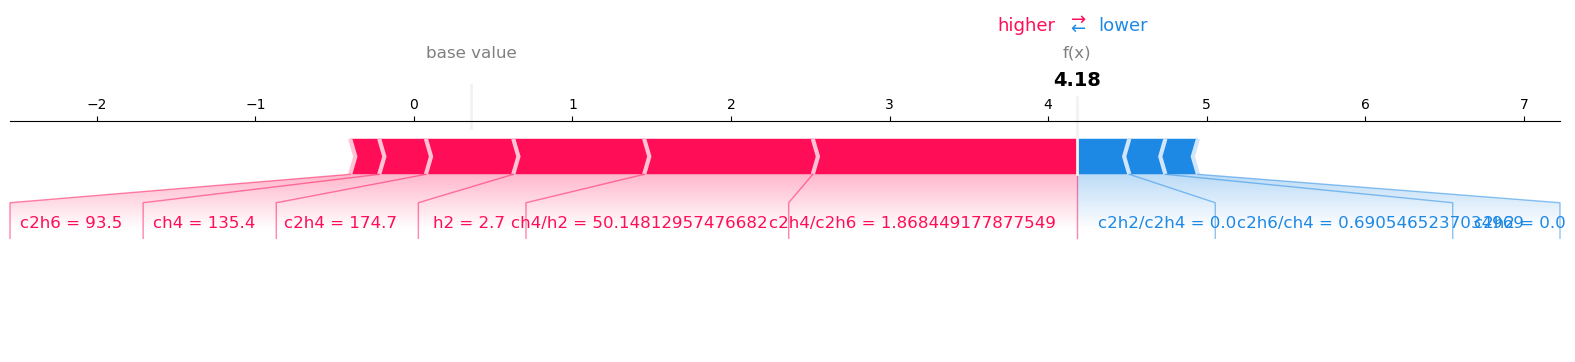

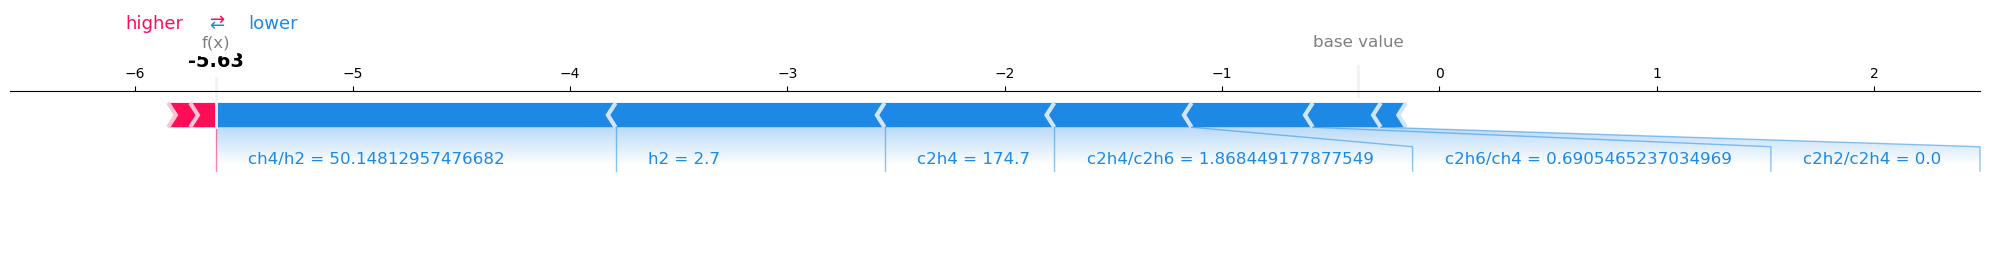

In [ ]:
import shap
import matplotlib.pyplot as plt

# 假设您的模型是 xgb1，测试集是 X_trinomial_test，shap_values 已经计算好

feature_names = ['h2', 'ch4', 'c2h6', 'c2h4', 'c2h2', 'ch4/h2', 'c2h6/ch4', 'c2h4/c2h6', 'c2h2/c2h4']
class_names = ['HED', 'HT', 'LED', 'LT', 'MT', 'PD']

# 创建一个 6x1 的子图
fig, axes = plt.subplots(6, 1, figsize=(20, 15))

# 循环绘制 force_plot
for i in range(6):
    ax = axes[i]

    # 绘制 force_plot，并获取生成的 Figure 对象
    force_fig = shap.force_plot(explainer.expected_value[i], shap_values[0, :, i], X_trinomial_test.iloc[0], feature_names=feature_names, matplotlib=True, show=False)

    # 将 force_plot 的内容复制到子图
    force_fig.canvas.draw()
    image = force_fig.canvas.copy_from_bbox(force_fig.bbox)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"Class: {class_names[i]}")  # 设置子图标题

# 调整子图布局
plt.tight_layout()
# 显示图形
plt.show()

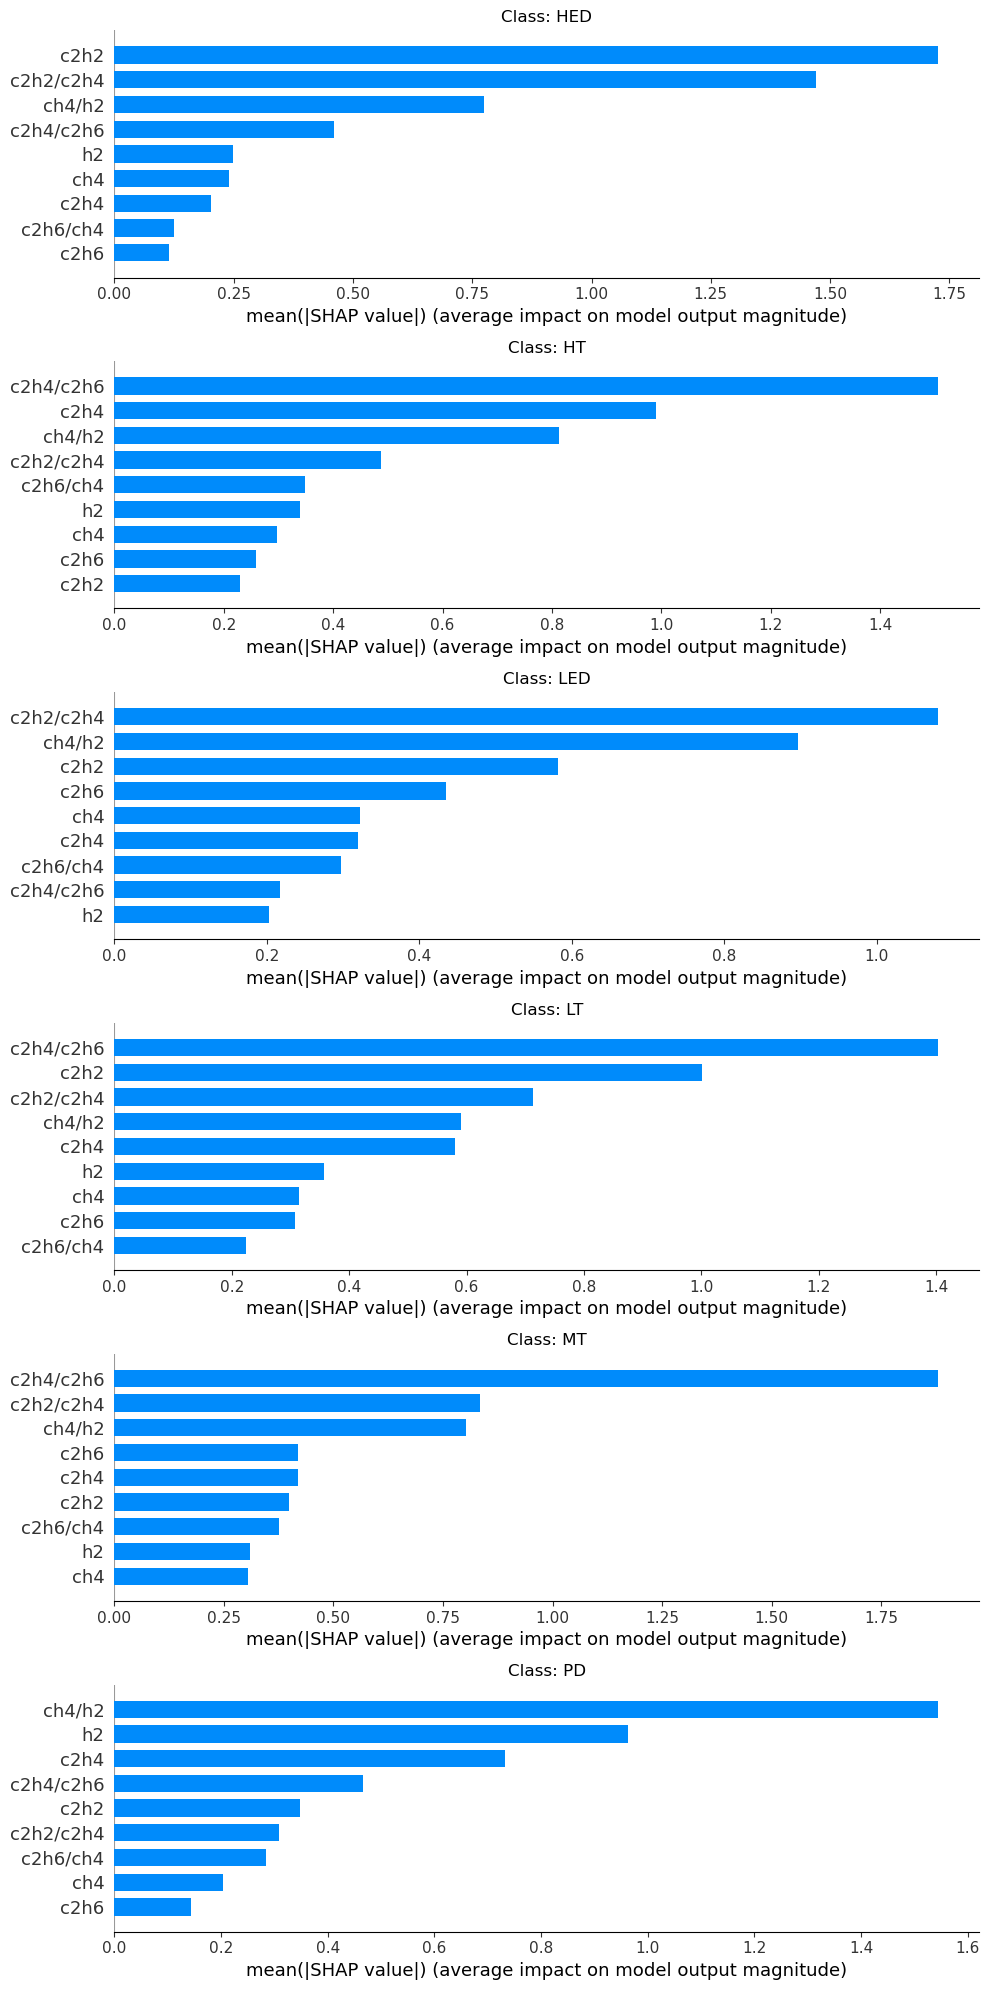

In [ ]:
import shap
import matplotlib.pyplot as plt

# 假设您的模型是 xgb1，测试集是 X_trinomial_test，shap_values 已经计算好

feature_names = ['h2', 'ch4', 'c2h6', 'c2h4', 'c2h2', 'ch4/h2', 'c2h6/ch4', 'c2h4/c2h6', 'c2h2/c2h4']
class_names = ['HED', 'HT', 'LED', 'LT', 'MT', 'PD']

# 绘制每个类别的摘要条形图
fig, axes = plt.subplots(6, 1, figsize=(20, 40))

for i in range(6):
    # 选择特定类别的 shap_values
    shap_values_class = shap_values[:, :, i]

    # 绘制摘要条形图
    plt.sca(axes[i])
    shap.summary_plot(shap_values_class, X_trinomial_test.values, feature_names=feature_names, plot_type="bar", show=False, plot_size=(10, 20))

    axes[i].set_title(f"Class: {class_names[i]}")  # 设置子图标题

# 调整布局并显示图形
plt.tight_layout()
plt.show()

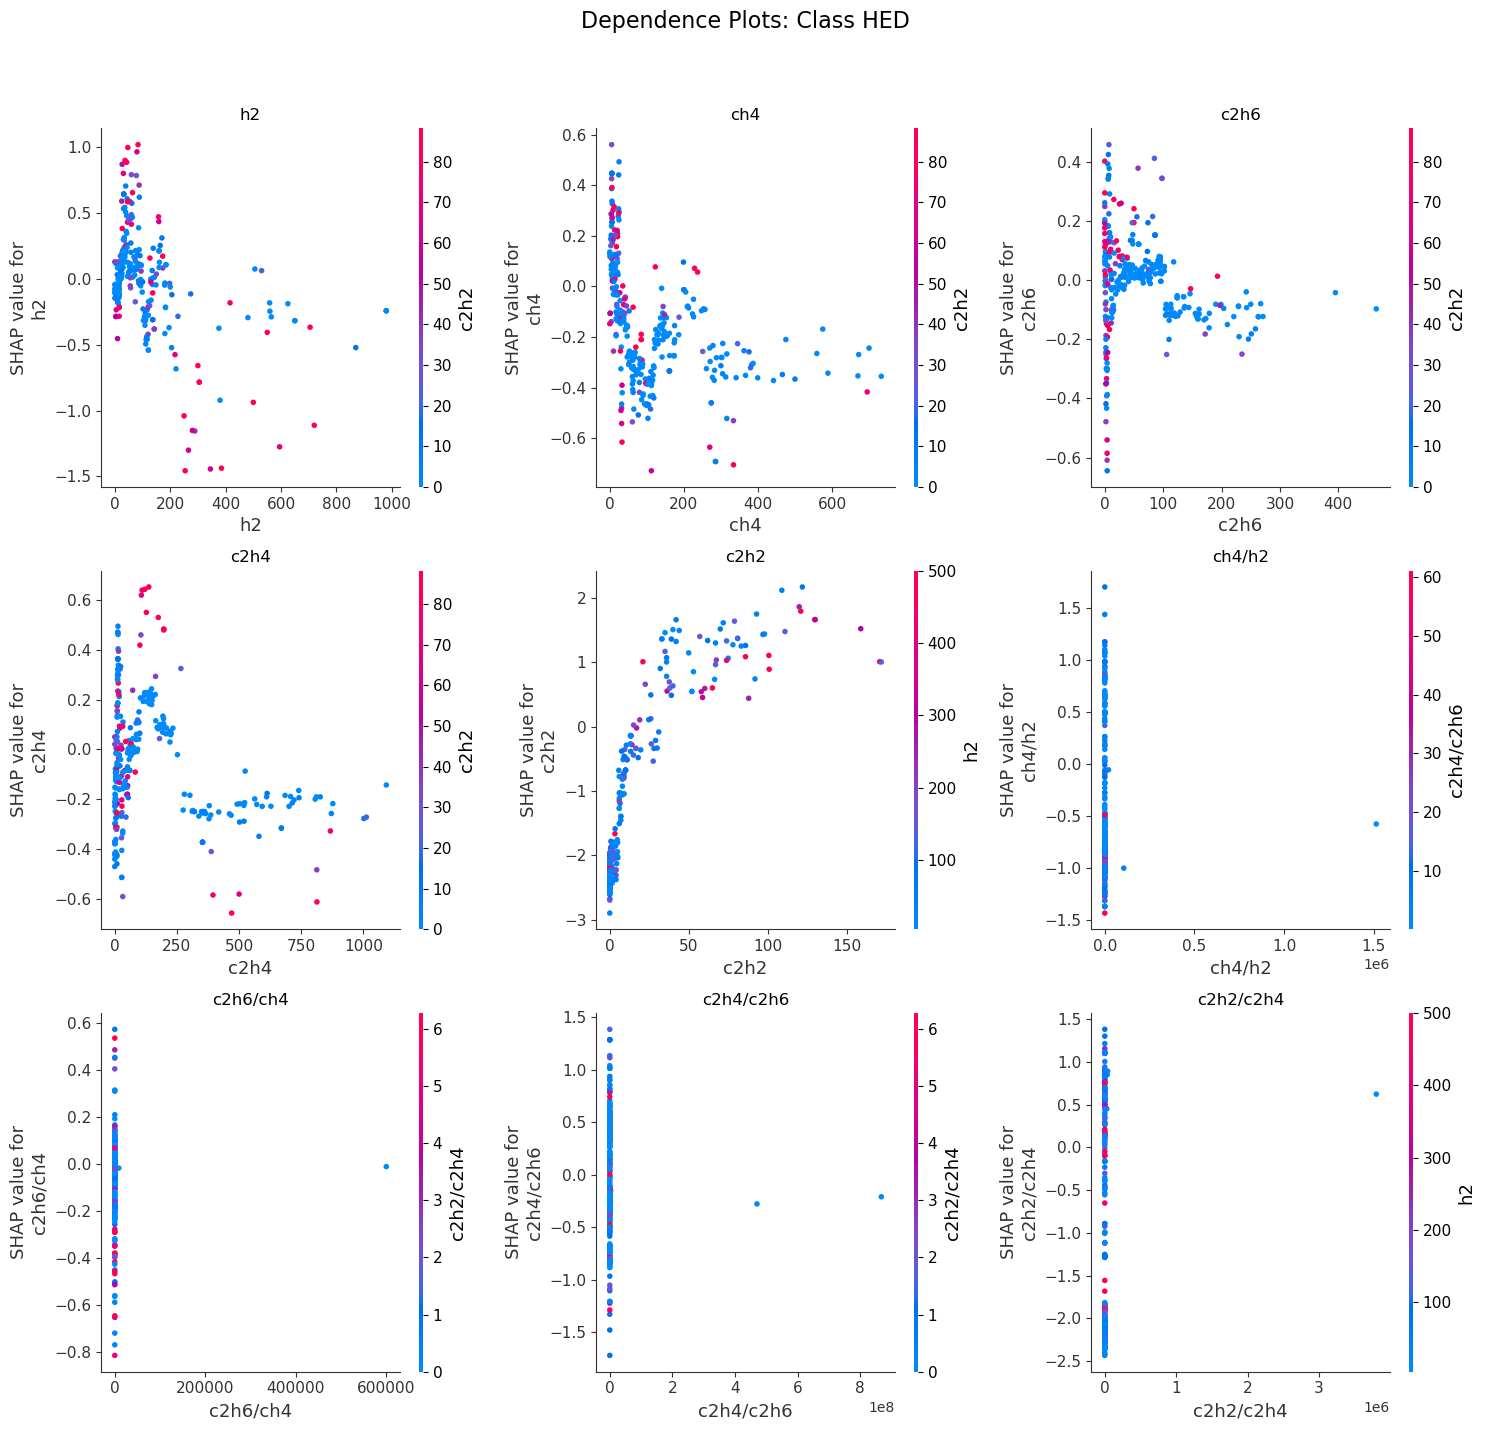

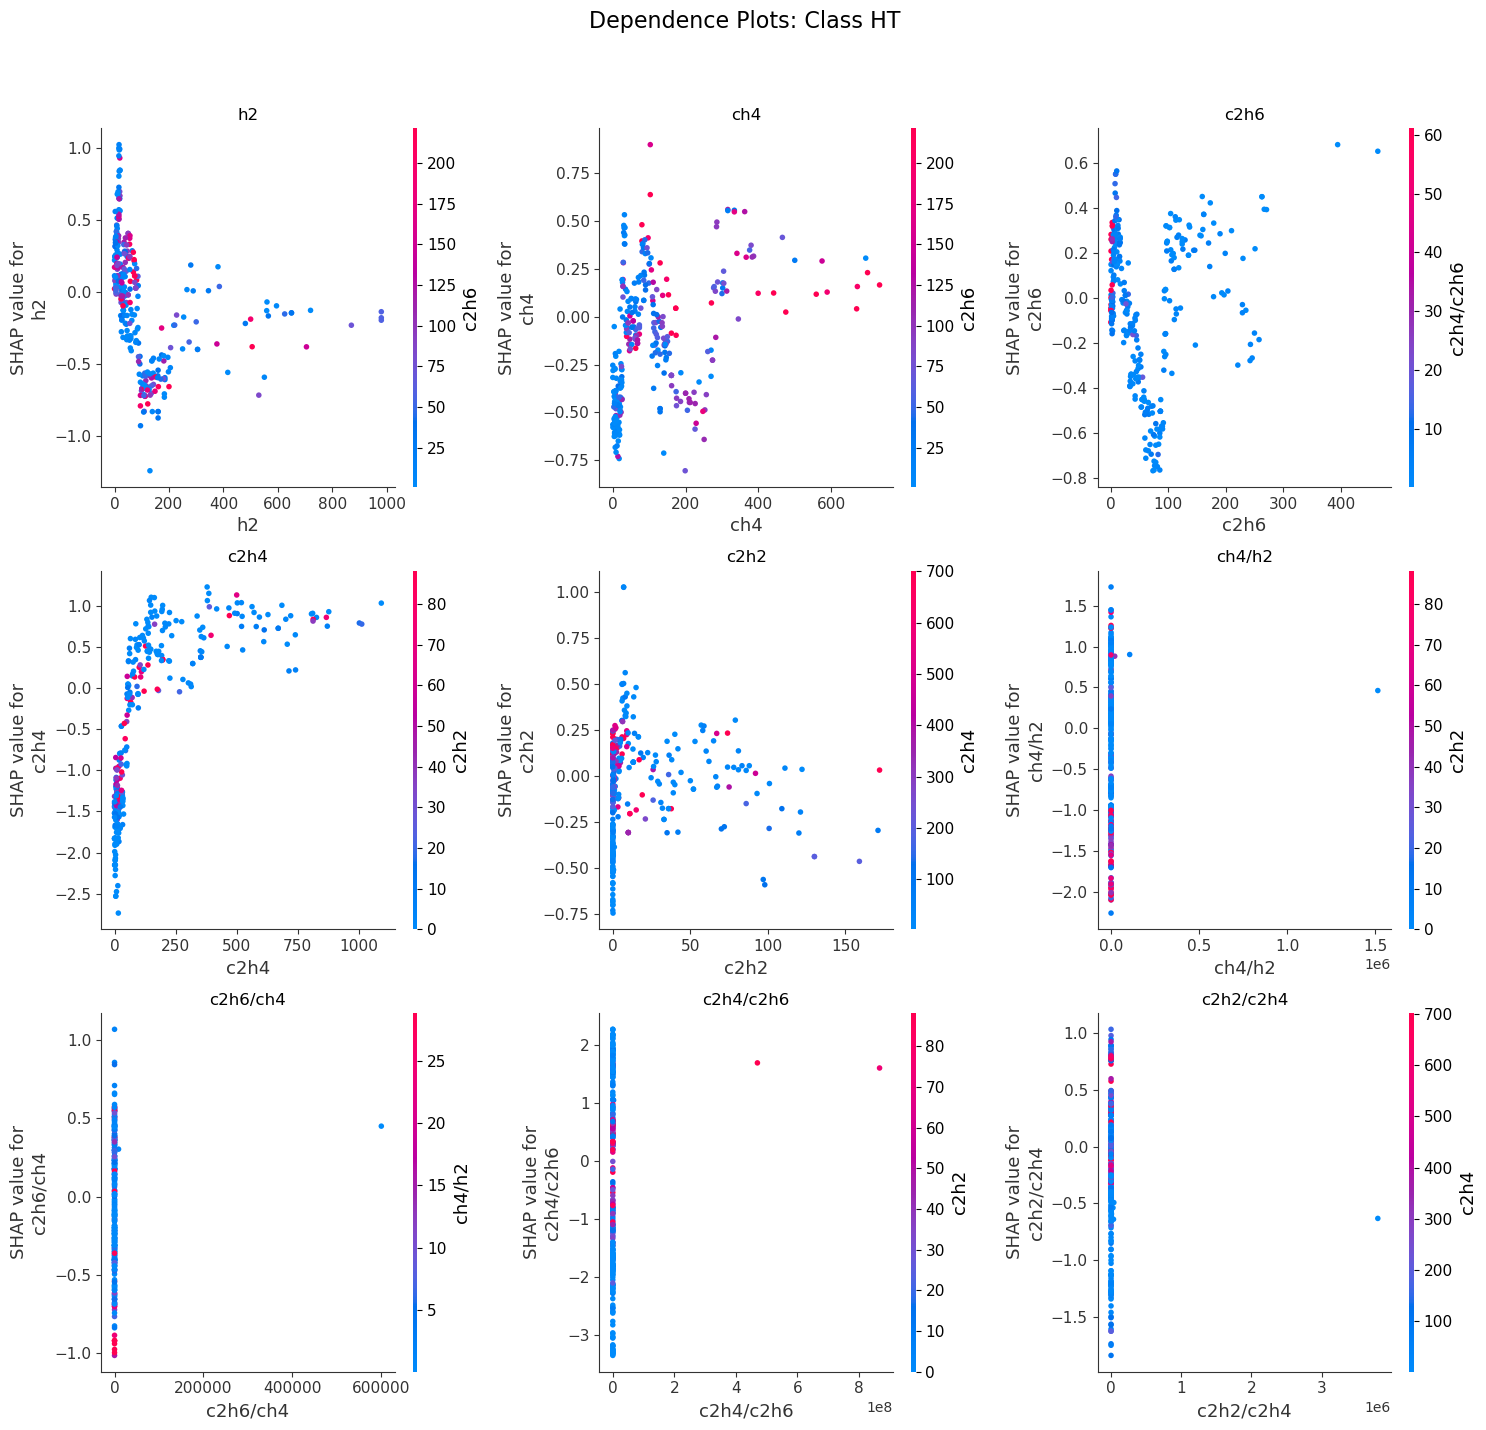

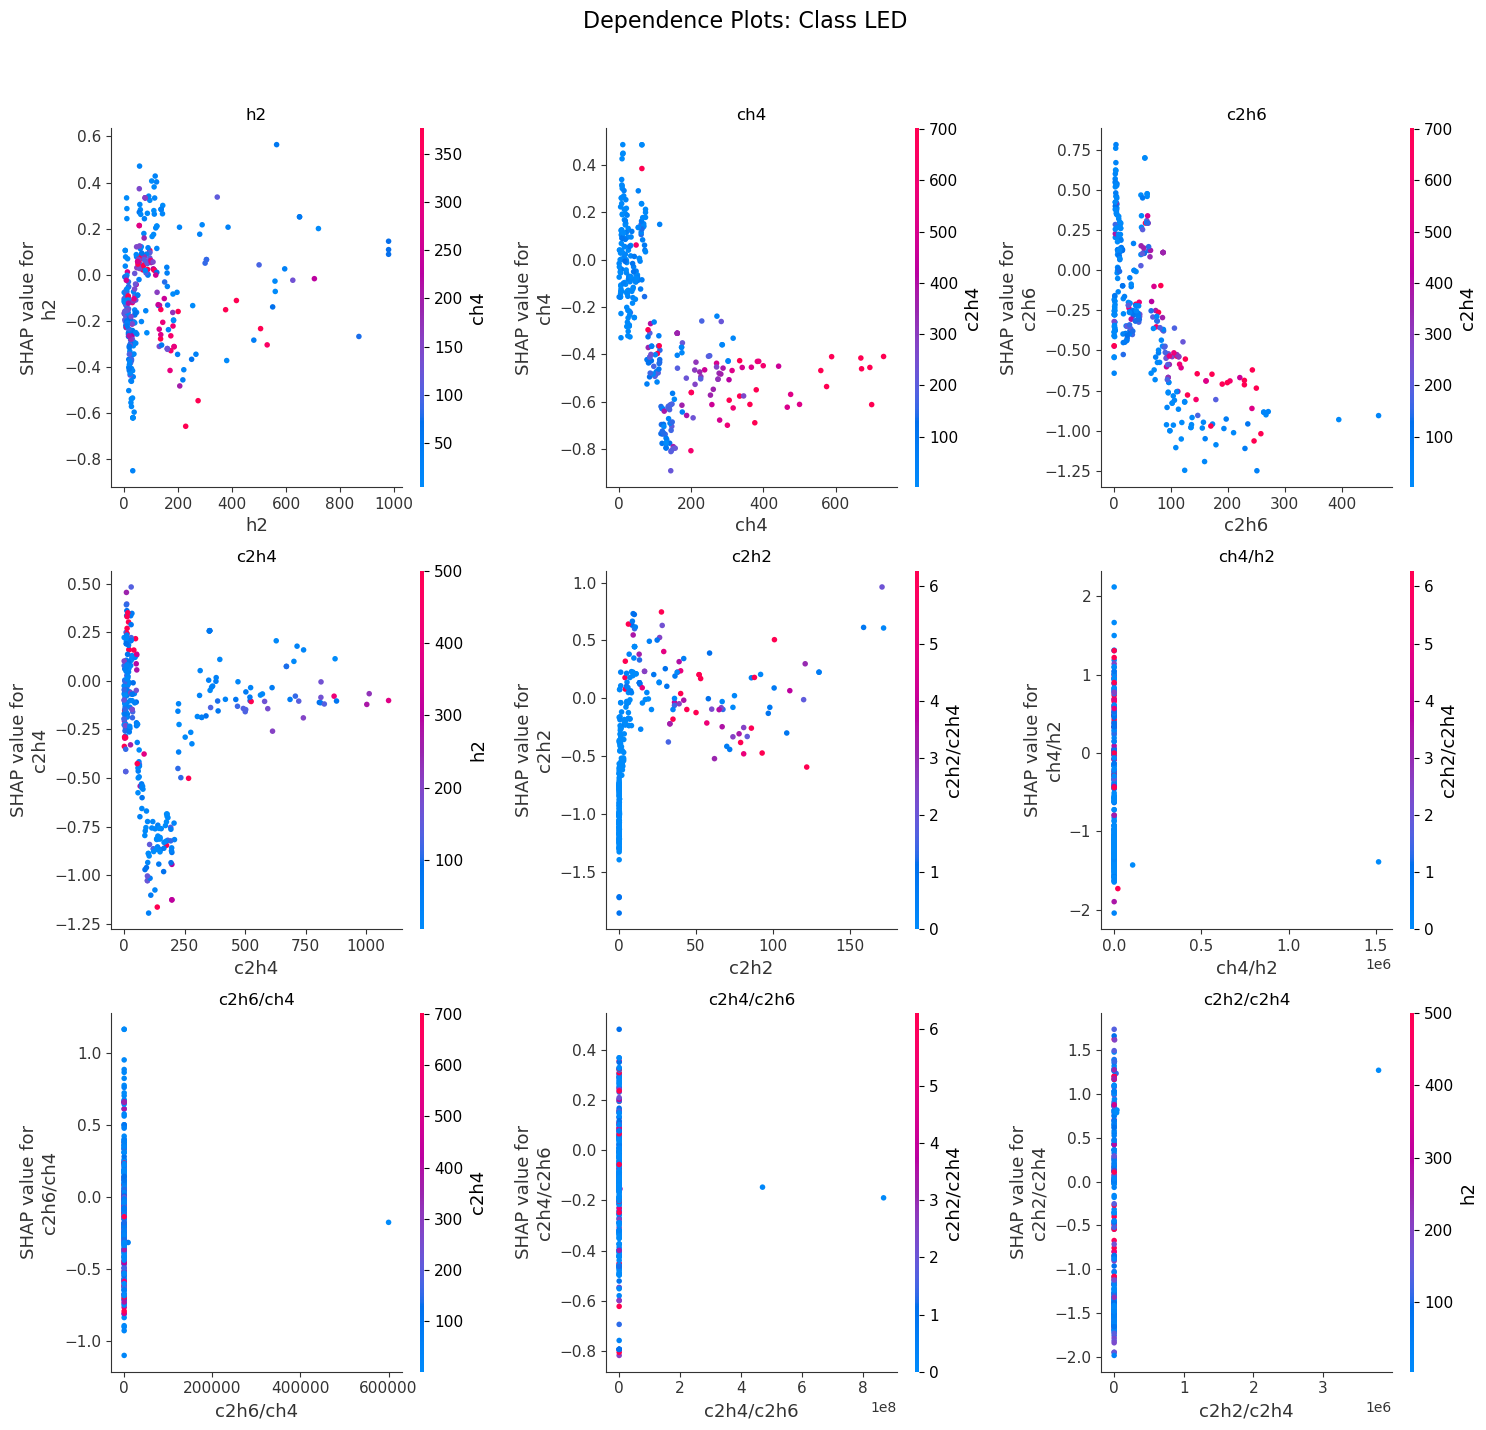

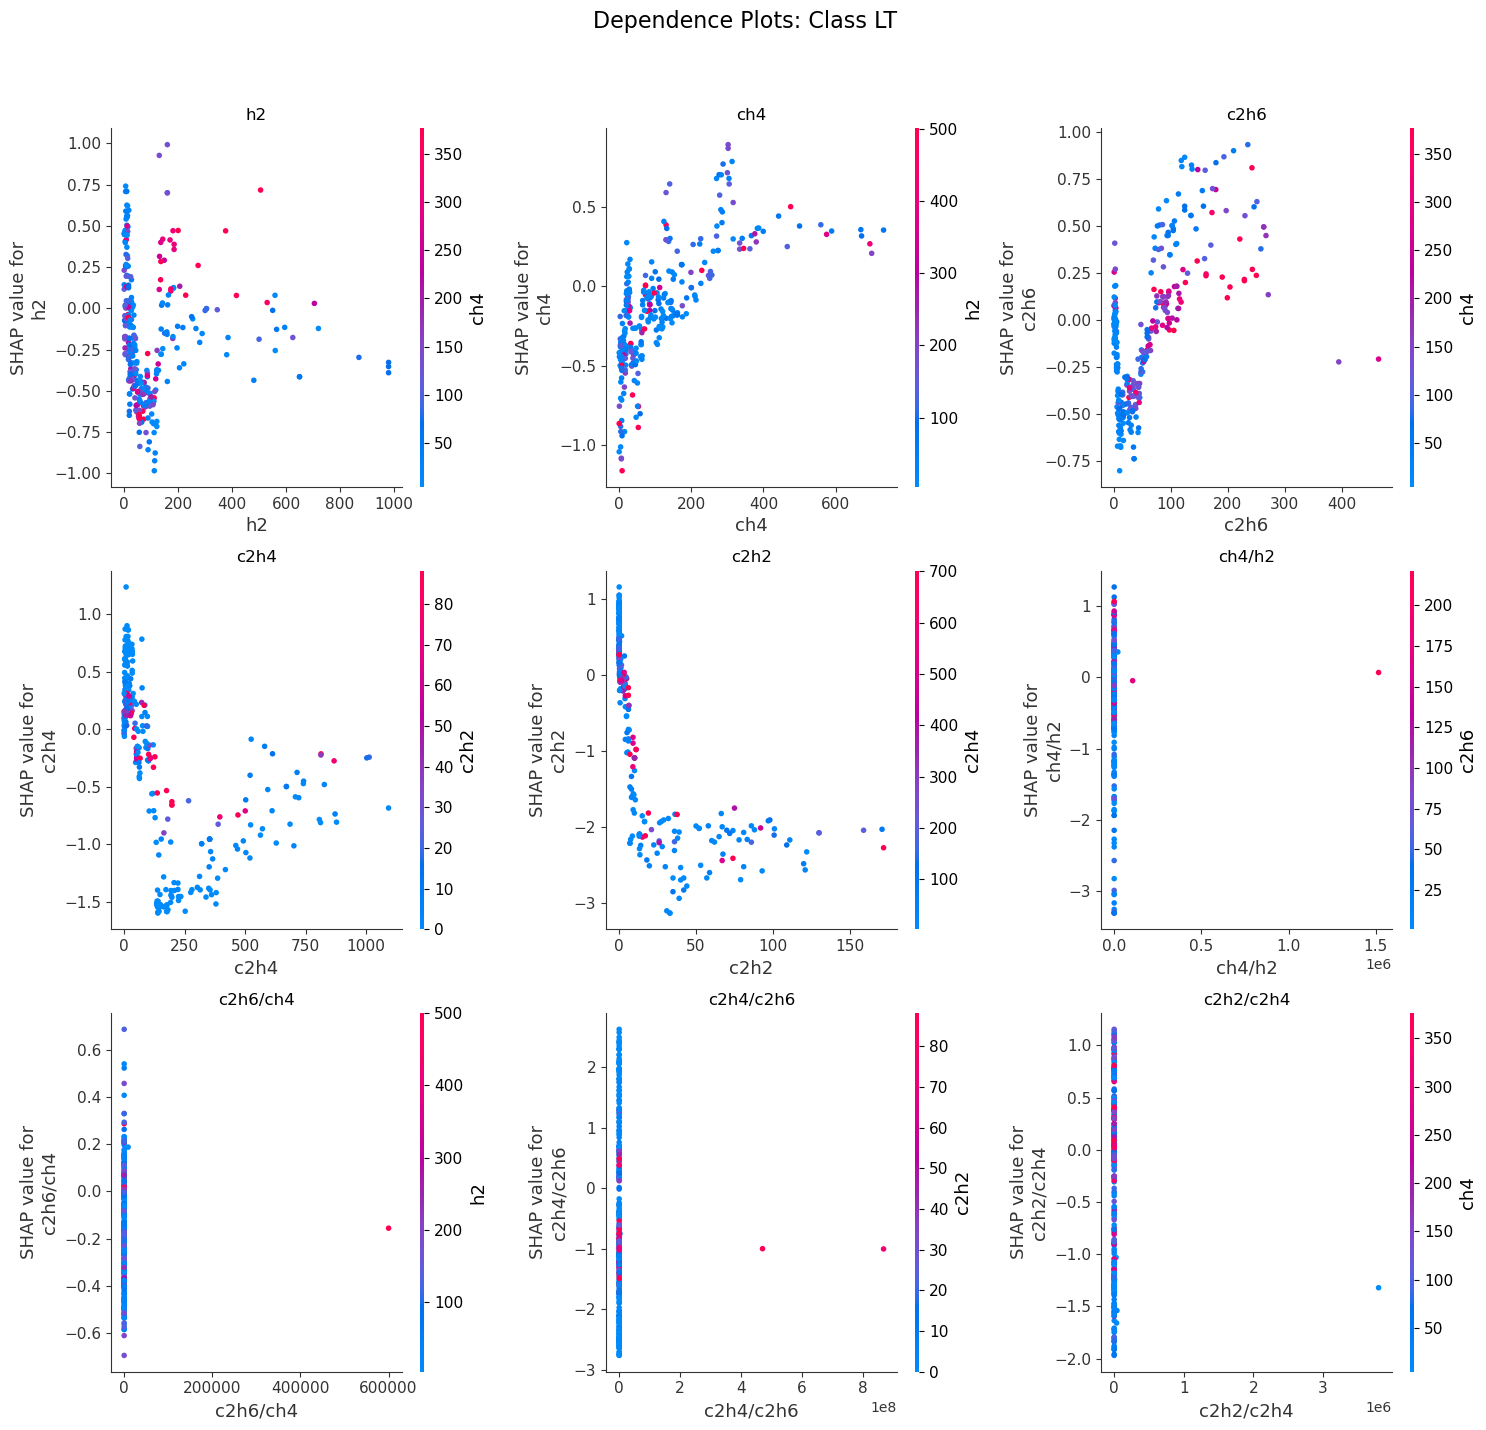

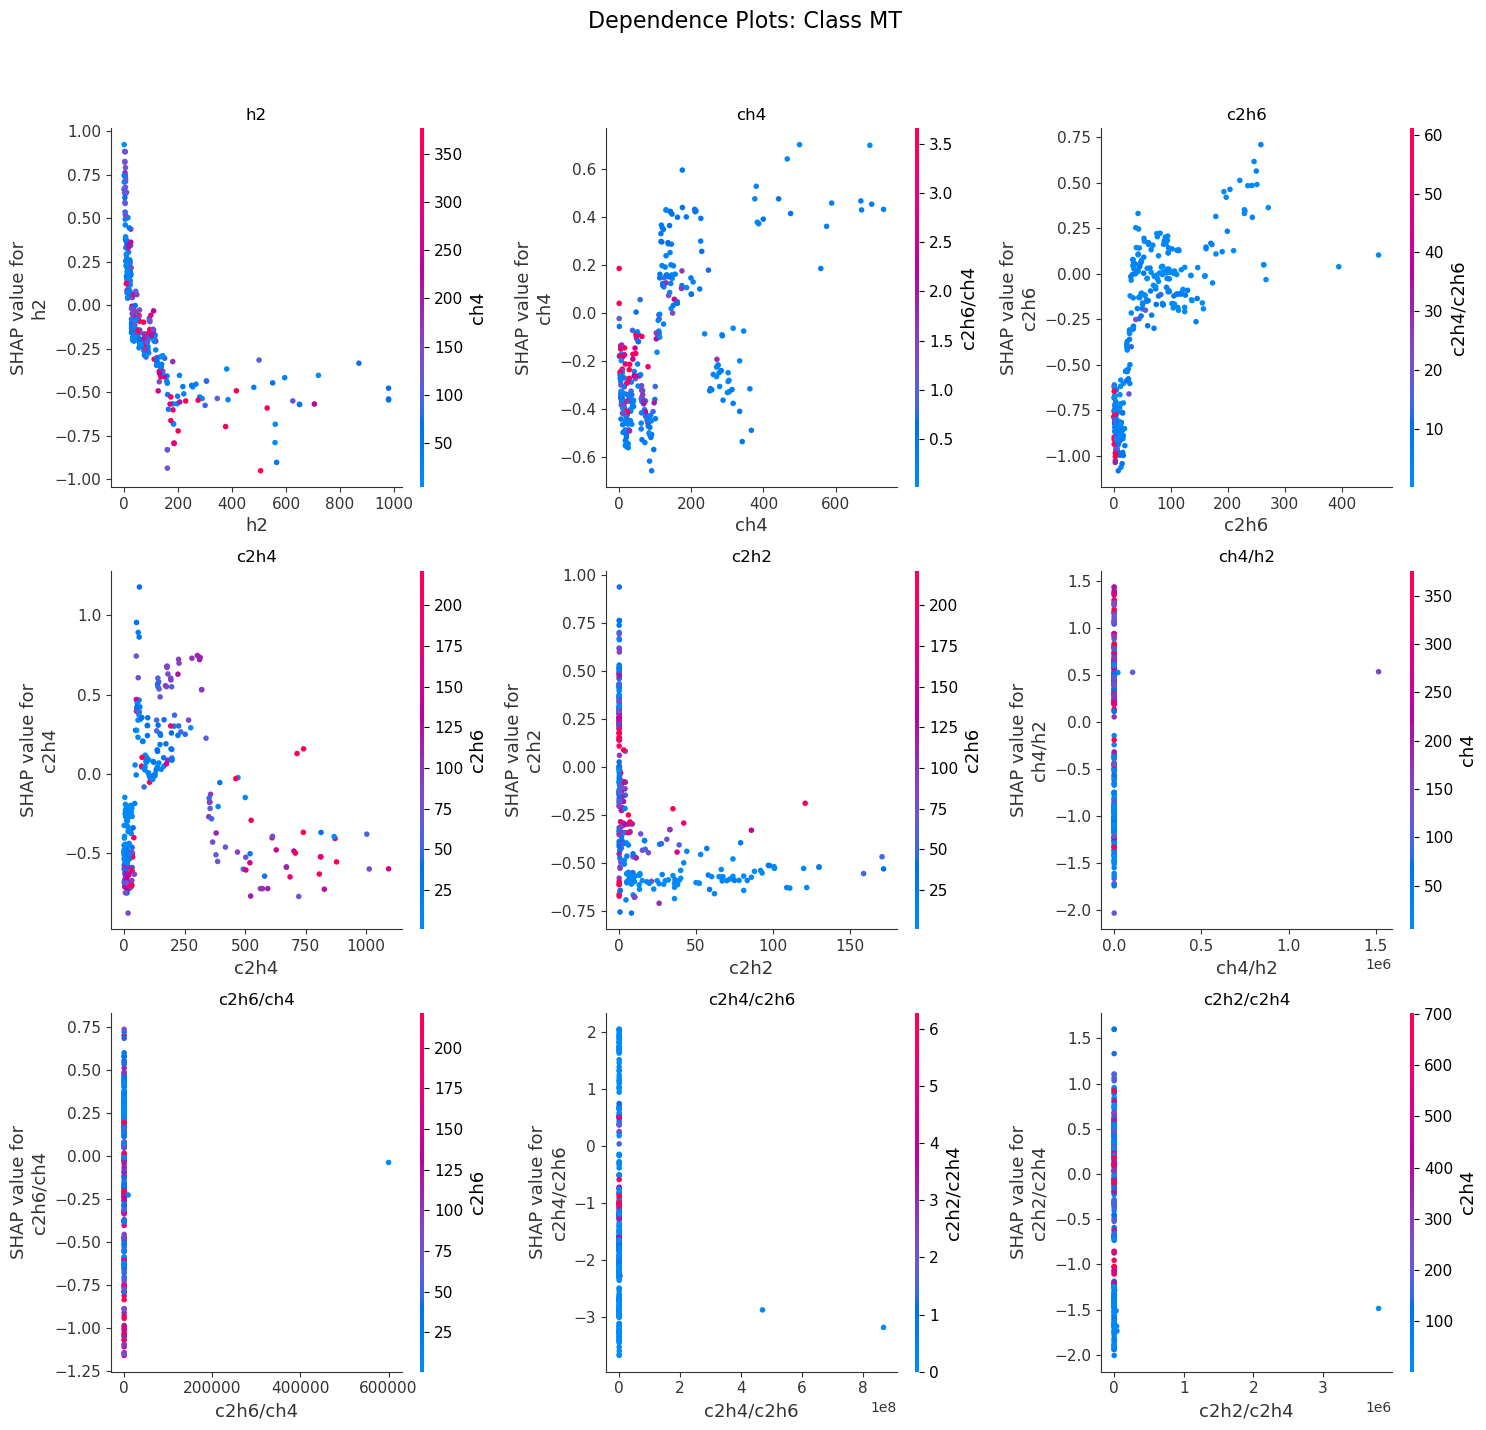

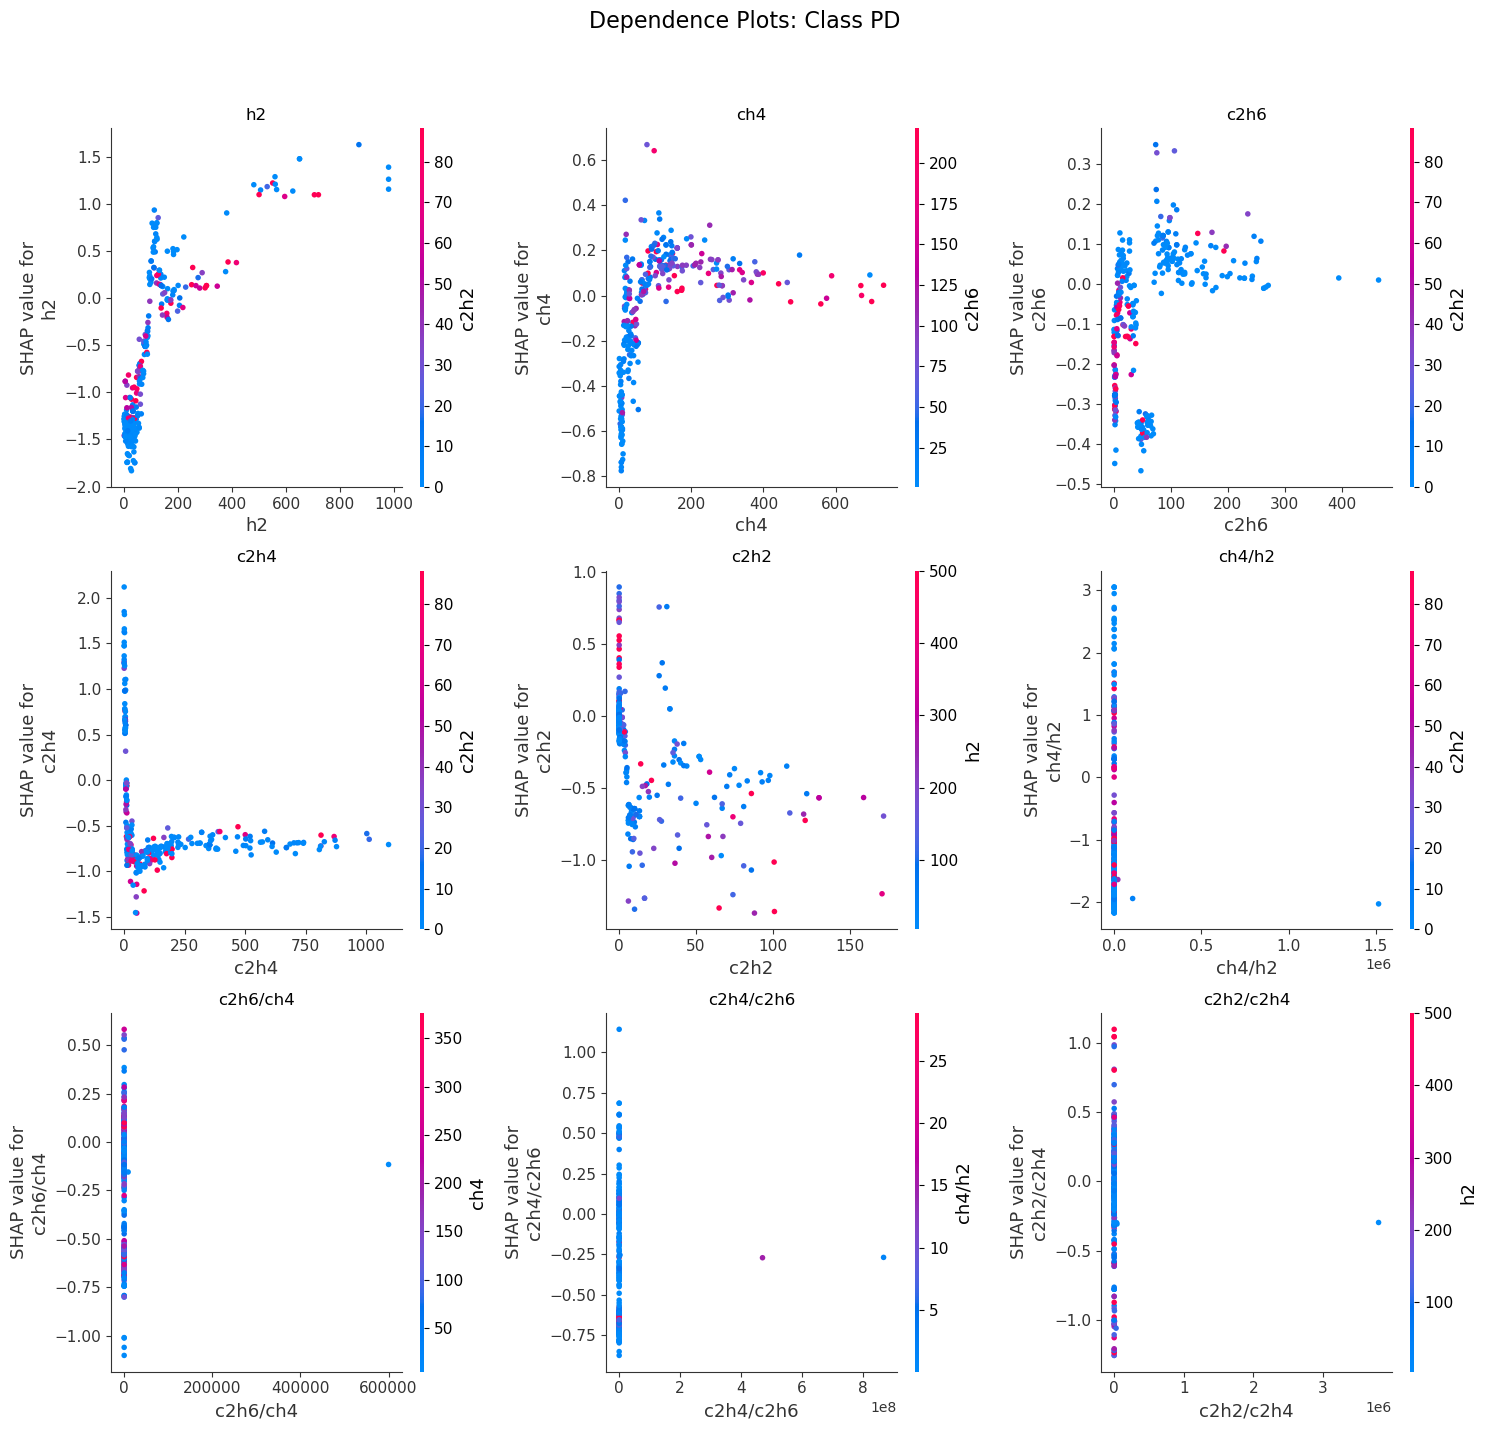

In [ ]:
import shap
import matplotlib.pyplot as plt

# 假设您的模型是 xgb1，测试集是 X_trinomial_test，shap_values 已经计算好

feature_names = ['h2', 'ch4', 'c2h6', 'c2h4', 'c2h2', 'ch4/h2', 'c2h6/ch4', 'c2h4/c2h6', 'c2h2/c2h4']
class_names = ['HED', 'HT', 'LED', 'LT', 'MT', 'PD']

# 3. 依赖图 (Dependence Plots)
# 绘制所有特征和类别的依赖图
for j in range(6):  # 遍历类别
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 创建 3x3 的子图网格
    fig.suptitle(f"Dependence Plots: Class {class_names[j]}", fontsize=16)  # 设置大图标题

    for i in range(len(feature_names)):  # 遍历特征
        row = i // 3  # 计算行索引
        col = i % 3  # 计算列索引
        ax = axes[row, col]  # 获取当前子图的 Axes 对象

        shap.dependence_plot(i, shap_values[:, :, j], X_trinomial_test.values, feature_names=feature_names, ax=ax, show=False)  # 绘制依赖图
        ax.set_title(f"{feature_names[i]}")  # 设置子图标题

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整布局，避免标题重叠
    plt.show()


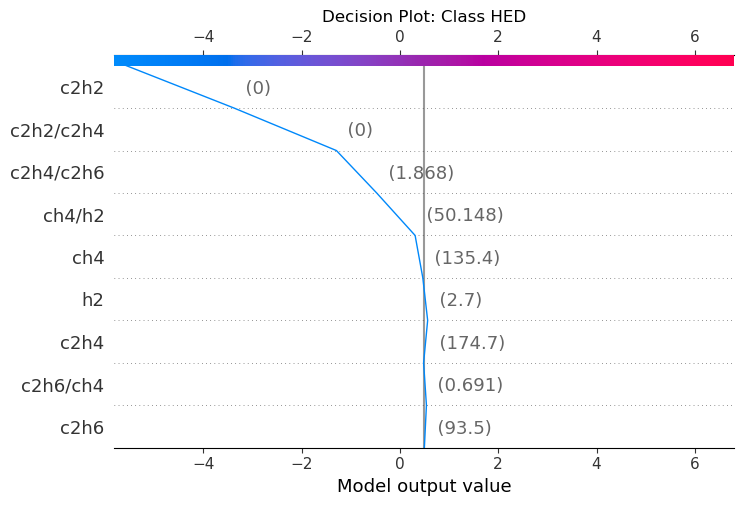

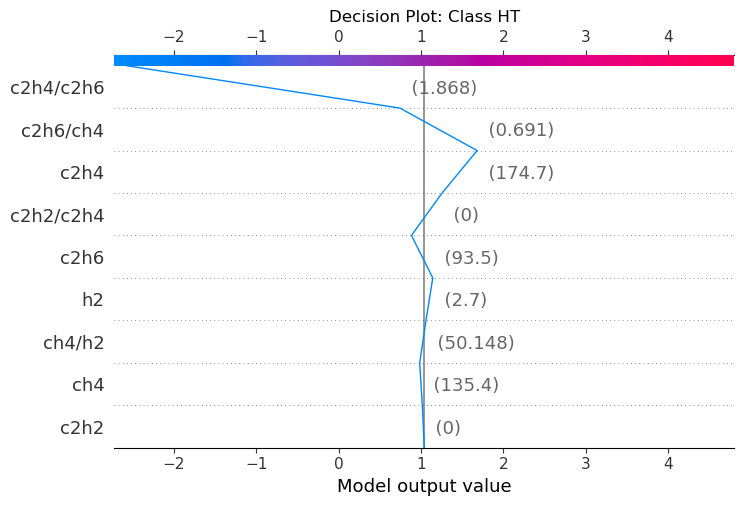

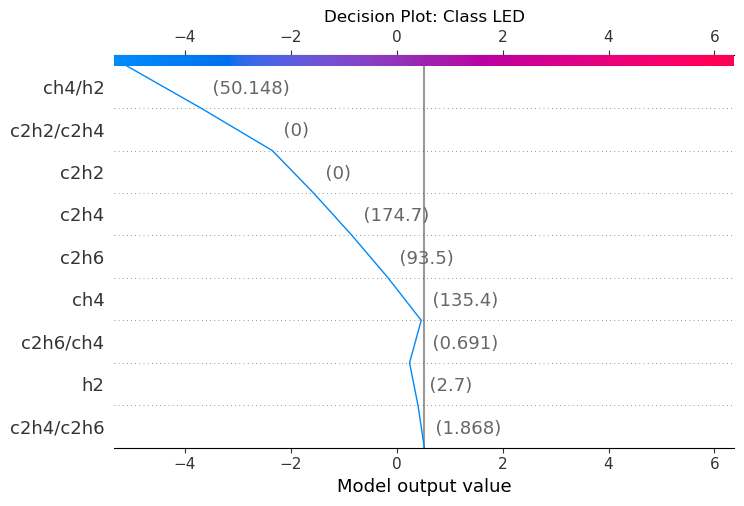

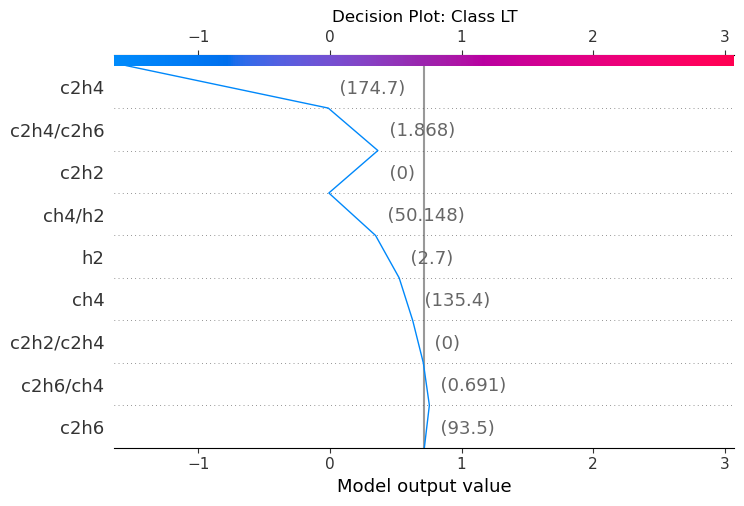

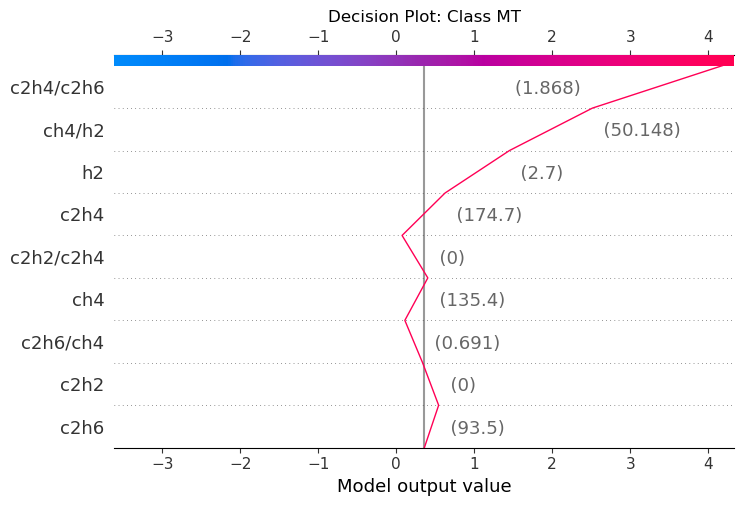

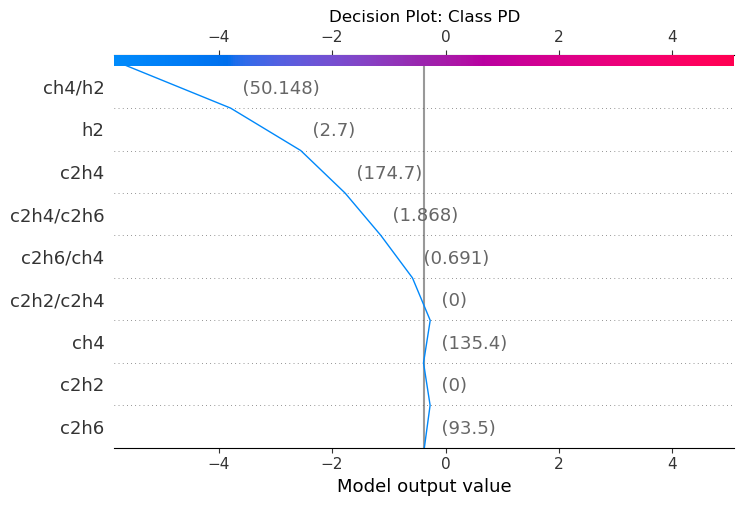

In [ ]:

# 4. 决策图 (Decision Plots)
# 绘制第一个样本的所有类别的决策图
for i in range(6):
    plt.figure()  # 创建一个新的图形
    shap.decision_plot(explainer.expected_value[i], shap_values[0, :, i], X_trinomial_test.iloc[0], feature_names=feature_names, title=f"Decision Plot: Class {class_names[i]}")
    plt.show()
# for j in range(6):  # 遍历类别
#     fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 创建 3x3 的子图网格
#     fig.suptitle(f"Dependence Plots: Class {class_names[j]}", fontsize=16)  # 设置大图标题

#     for i in range(len(feature_names)):  # 遍历特征
#         row = i // 3  # 计算行索引
#         col = i % 3  # 计算列索引
#         ax = axes[row, col]  # 获取当前子图的 Axes 对象

#         shap.decision_plot(explainer.expected_value[i], shap_values[0, :, i], X_trinomial_test.iloc[0], feature_names=feature_names, title=f"Decision Plot: Class {class_names[i]}")
#         ax.set_title(f"{feature_names[i]}")  # 设置子图标题

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 调整布局，避免标题重叠
#     plt.show()

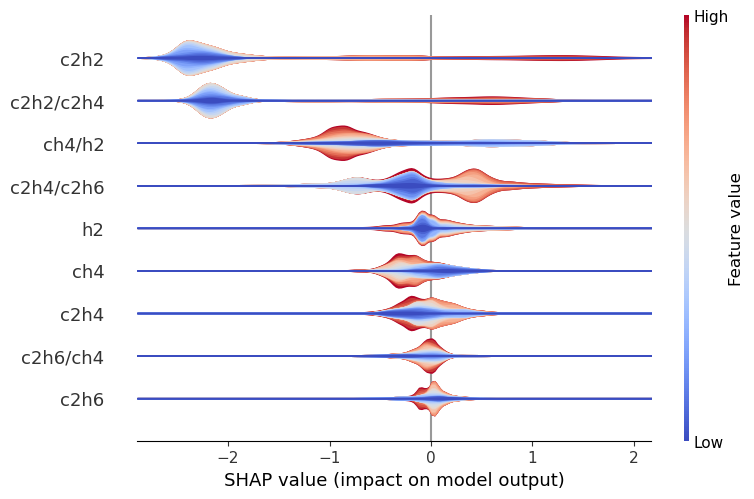

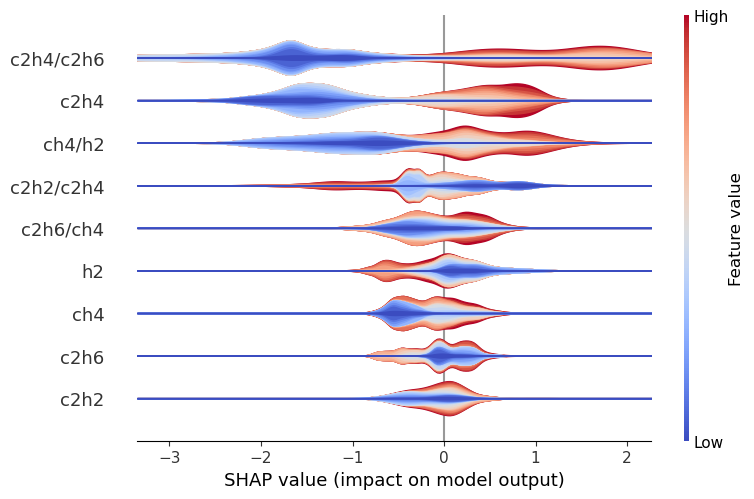

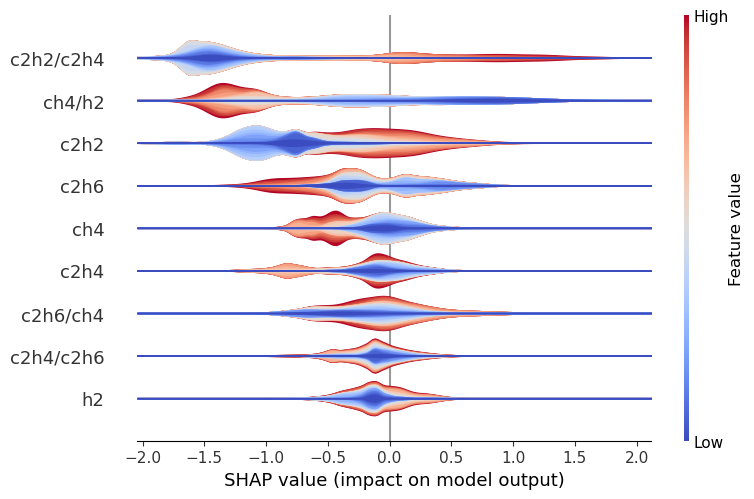

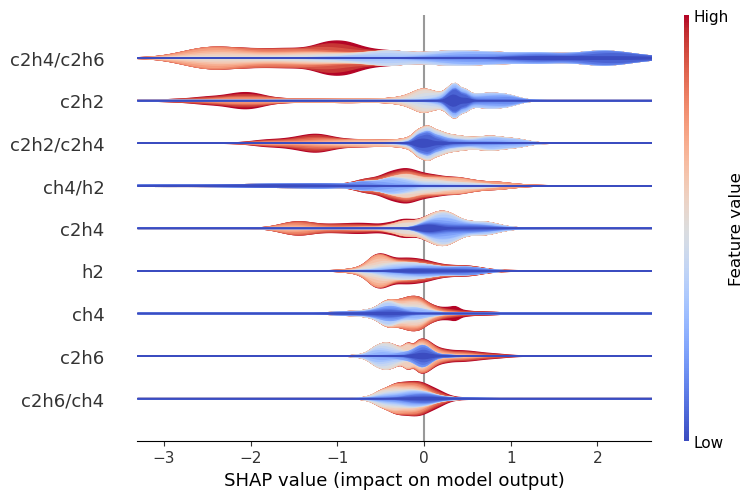

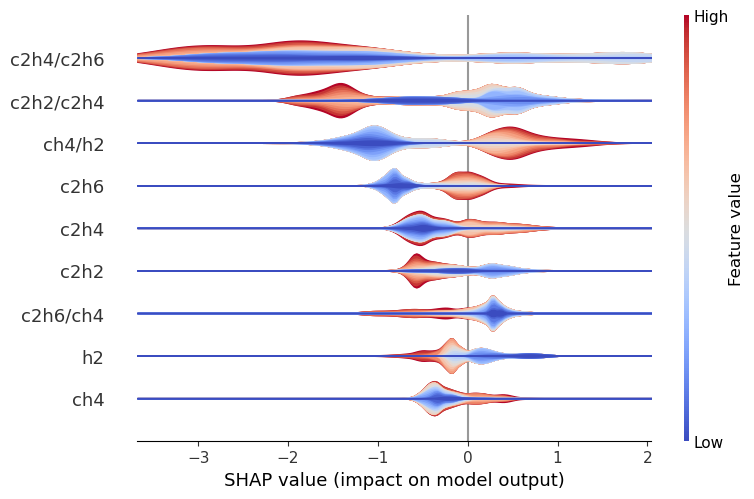

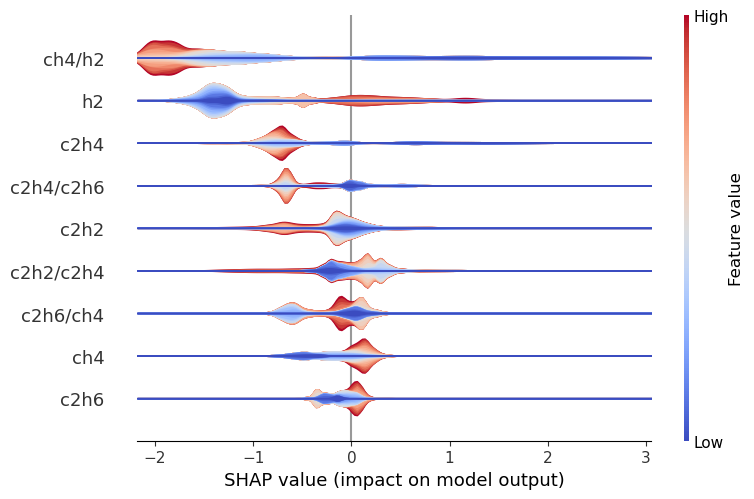

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
# 5. 聚类图 (Clustering Plots)
# 绘制第一个类别的聚类图 (使用 AgglomerativeClustering)
shap_values_class = shap_values[:, :, 0]  # 选择第一个类别的 shap_values

# 5. 聚类图 (Clustering Plots)
# 绘制所有类别的聚类图 (使用 AgglomerativeClustering)
for j in range(6):  # 遍历类别
    shap_values_class = shap_values[:, :, j]  # 选择当前类别的 shap_values

    # 执行聚类
    clustering = AgglomerativeClustering(n_clusters=3)  # 设置聚类数量
    cluster_labels = clustering.fit_predict(shap_values_class)

    # 绘制聚类结果
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_class, X_trinomial_test.values, feature_names=feature_names, plot_type="layered_violin", class_names=[f"Cluster {i}" for i in np.unique(cluster_labels)], class_inds=cluster_labels, title=f"Clustering Plot: Class {class_names[j]}")
    plt.show()

## 随机森林 87.19%

Accuracy: 87.19%


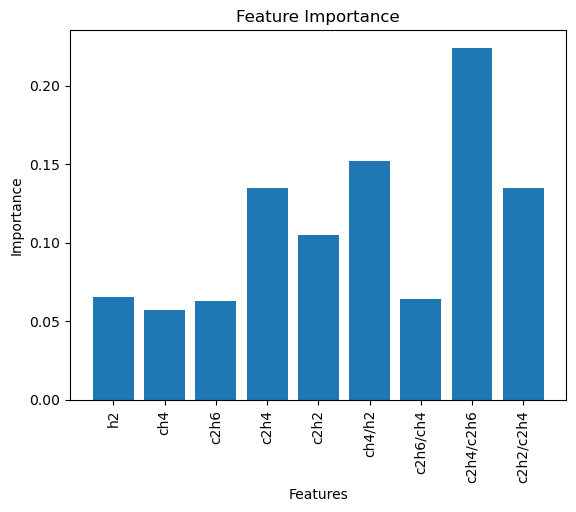

h2: 0.0655
ch4: 0.0574
c2h6: 0.0627
c2h4: 0.1350
c2h2: 0.1050
ch4/h2: 0.1518
c2h6/ch4: 0.0642
c2h4/c2h6: 0.2240
c2h2/c2h4: 0.1346


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经定义

clf = RandomForestClassifier(max_depth=18, random_state=42)

clf.fit(X_trinomial_train, y_trinomial_train)

y_trinomial_t = clf.predict(X_trinomial_test)
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 获取特征重要性
importance = clf.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_trinomial_train.columns, rotation='vertical')  # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_trinomial_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

In [ ]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_trinomial_train, y_trinomial_train)
    y_trinomial_t = clf.predict(X_trinomial_test)
    accuracy_trinomial = accuracy_score(y_trinomial_t,y_trinomial_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy_trinomial * 100.0))

Depth: 1, Accuracy: 56.25%
Depth: 2, Accuracy: 70.62%
Depth: 3, Accuracy: 75.31%
Depth: 4, Accuracy: 78.75%
Depth: 5, Accuracy: 80.31%
Depth: 6, Accuracy: 81.88%
Depth: 7, Accuracy: 82.50%
Depth: 8, Accuracy: 85.31%
Depth: 9, Accuracy: 86.25%
Depth: 10, Accuracy: 86.88%
Depth: 11, Accuracy: 85.62%
Depth: 12, Accuracy: 86.56%
Depth: 13, Accuracy: 86.88%
Depth: 14, Accuracy: 86.88%
Depth: 15, Accuracy: 86.88%
Depth: 16, Accuracy: 86.88%
Depth: 17, Accuracy: 86.88%
Depth: 18, Accuracy: 87.19%
Depth: 19, Accuracy: 86.88%


### SMOTE 86.56%

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 您的代码

# 恢复警告（可选）
# warnings.filterwarnings("default")

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 创建一个包含 SMOTE 和 RandomForestClassifier 的管道
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=6)),
    ('classifier', RandomForestClassifier(max_depth=11, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_train, y_trinomial_train)

# 预测测试集
y_trinomial_t = pipeline.predict(X_trinomial_test)

# 计算准确率
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.56%


In [ ]:
y_trinomial_train_t = pipeline.predict(X_trinomial_train)
accuracy_in_train = accuracy_score(y_trinomial_train_t, y_trinomial_train)
print("Accuracy: %.2f%%" % (accuracy_in_train * 100.0))

Accuracy: 98.67%


In [ ]:
# 测试SMOTE的k_neighbors从1到10，以及随机森林深度从1到20的结果
for k in range(1, 11):
    for depth in range(1, 21):
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=42, k_neighbors=k)),
            ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))
        ])
        
        # 训练模型
        pipeline.fit(X_trinomial_train, y_trinomial_train)
        
        # 预测测试集
        y_trinomial_t = pipeline.predict(X_trinomial_test)
        
        # 计算准确率
        accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
        print("k_neighbors: %d, Depth: %d, Accuracy: %.2f%%" % (k, depth, accuracy * 100.0))

k_neighbors: 1, Depth: 1, Accuracy: 49.06%
k_neighbors: 1, Depth: 2, Accuracy: 73.75%
k_neighbors: 1, Depth: 3, Accuracy: 75.00%
k_neighbors: 1, Depth: 4, Accuracy: 77.19%
k_neighbors: 1, Depth: 5, Accuracy: 79.38%
k_neighbors: 1, Depth: 6, Accuracy: 82.81%
k_neighbors: 1, Depth: 7, Accuracy: 83.44%
k_neighbors: 1, Depth: 8, Accuracy: 83.75%
k_neighbors: 1, Depth: 9, Accuracy: 84.38%
k_neighbors: 1, Depth: 10, Accuracy: 85.00%
k_neighbors: 1, Depth: 11, Accuracy: 83.75%
k_neighbors: 1, Depth: 12, Accuracy: 84.38%
k_neighbors: 1, Depth: 13, Accuracy: 85.00%
k_neighbors: 1, Depth: 14, Accuracy: 83.75%
k_neighbors: 1, Depth: 15, Accuracy: 84.69%
k_neighbors: 1, Depth: 16, Accuracy: 84.38%
k_neighbors: 1, Depth: 17, Accuracy: 84.69%
k_neighbors: 1, Depth: 18, Accuracy: 84.69%
k_neighbors: 1, Depth: 19, Accuracy: 84.38%
k_neighbors: 1, Depth: 20, Accuracy: 84.38%
k_neighbors: 2, Depth: 1, Accuracy: 52.81%
k_neighbors: 2, Depth: 2, Accuracy: 74.69%
k_neighbors: 2, Depth: 3, Accuracy: 75.31%


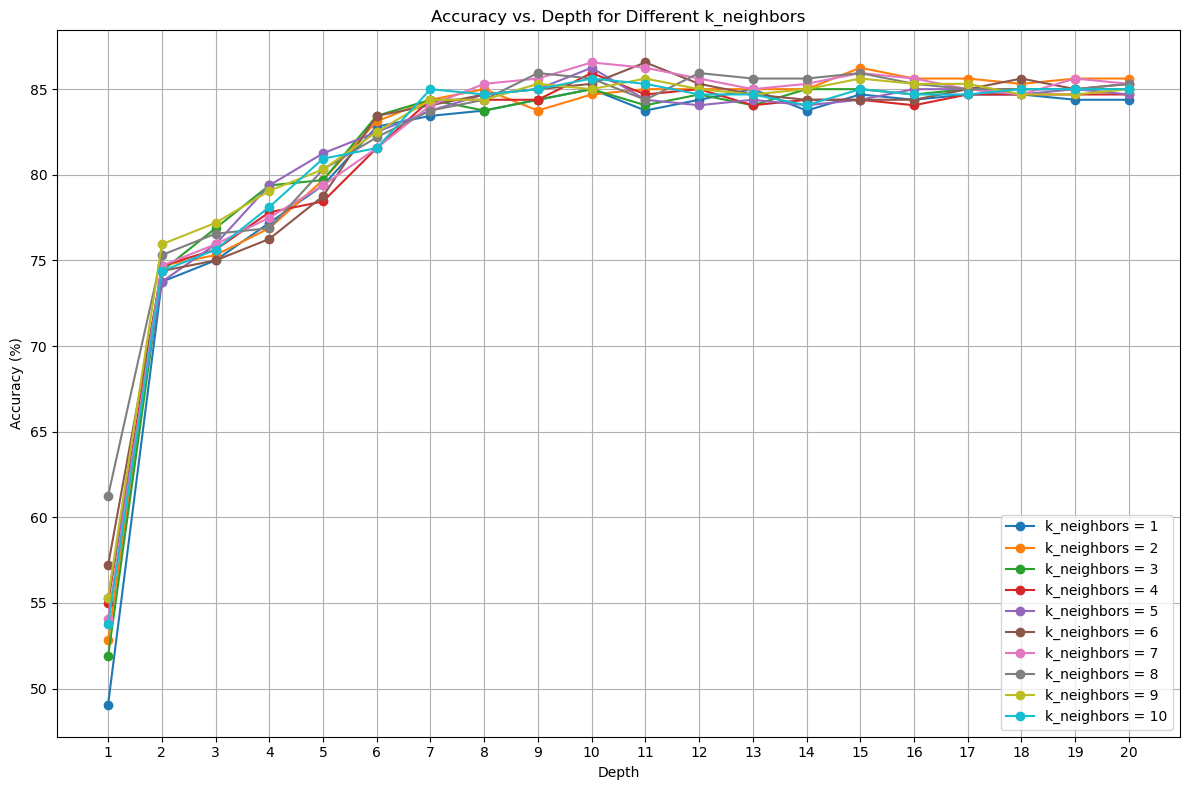

In [ ]:
import matplotlib.pyplot as plt

def plot_all_accuracies(filename="RFC_SMOTE_all_cleaned.txt"):
    """
    将所有 k_neighbors 对应的准确率折线图绘制在同一张图上。

    Args:
        filename (str): 文件名。
    """

    data = {}
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                k_neighbors, depth, accuracy = line.split(", ")
                k_neighbors = int(k_neighbors.split(": ")[1])
                depth = int(depth.split(": ")[1])
                accuracy = float(accuracy.split(": ")[1].replace("%", ""))

                if k_neighbors not in data:
                    data[k_neighbors] = {"depths": [], "accuracies": []}

                data[k_neighbors]["depths"].append(depth)
                data[k_neighbors]["accuracies"].append(accuracy)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap("tab10").colors  # 使用 tab10 色彩映射获取 10 种颜色

    for i, (k, values) in enumerate(data.items()):
        plt.plot(values["depths"], values["accuracies"], marker='o', label=f"k_neighbors = {k}", color=colors[i])

    plt.title("Accuracy vs. Depth for Different k_neighbors")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.legend()  # 添加图例
    plt.xticks(list(range(1, 21)))  # 设置 x 轴刻度为 1 到 20
    plt.tight_layout()
    plt.show()

# 调用函数绘制折线图
plot_all_accuracies()

#### 各类别准确率

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 假设 X_trinomial_train, y_trinomial_train, X_trinomial_test, y_trinomial_test 已经定义

# 创建管道
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=4)),
    ('classifier', RandomForestClassifier(max_depth=12, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_train, y_trinomial_train)

# 预测训练集和测试集
y_train_pred = pipeline.predict(X_trinomial_train)
y_test_pred = pipeline.predict(X_trinomial_test)

# 输出各个类别的准确率
print("Training Set Classification Report:")
print(classification_report(y_trinomial_train, y_train_pred))
print("Testing Set Classification Report:")
print(classification_report(y_trinomial_test, y_test_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       204
           1       0.99      0.99      0.99       364
           2       0.96      0.97      0.96       165
           3       1.00      1.00      1.00       247
           4       1.00      1.00      1.00       203
           5       0.98      1.00      0.99        93

    accuracy                           0.99      1276
   macro avg       0.99      0.99      0.99      1276
weighted avg       0.99      0.99      0.99      1276

Testing Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        46
           1       0.97      0.90      0.93       106
           2       0.61      0.72      0.66        46
           3       0.90      0.88      0.89        60
           4       0.90      0.95      0.92        38
           5       0.84      0.88      0.86        24

    ac

#### 混淆矩阵

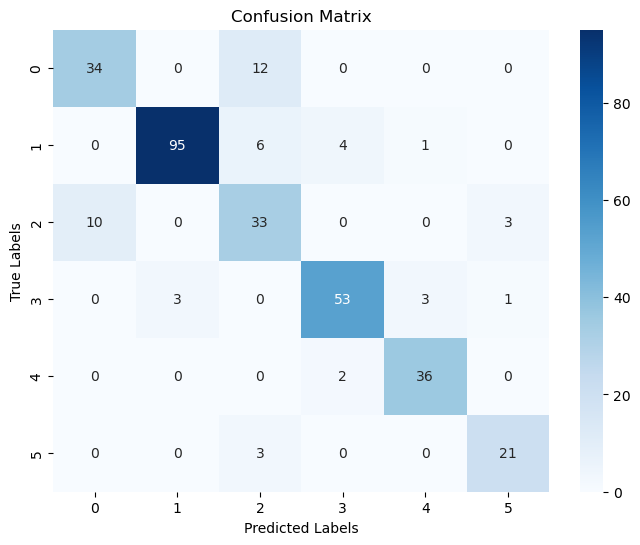

In [ ]:
import seaborn as sns
# 生成混淆矩阵
cm = confusion_matrix(y_trinomial_test, y_test_pred)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

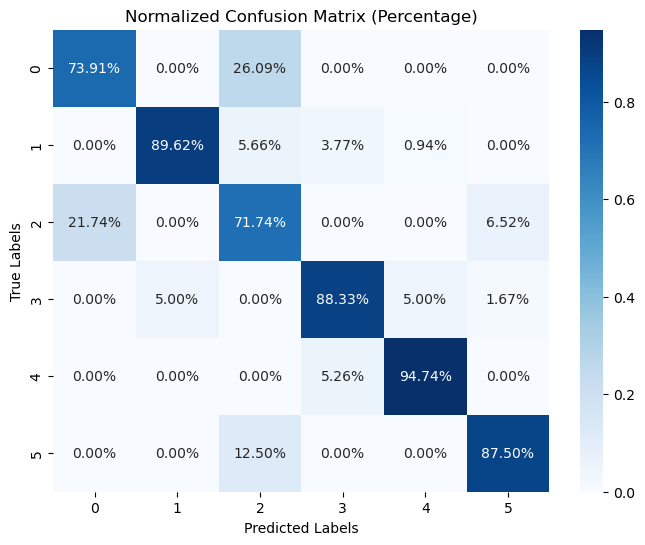

In [ ]:
# 生成混淆矩阵
cm = confusion_matrix(y_trinomial_test, y_test_pred)

# 归一化混淆矩阵
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# 可视化归一化后的混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues') # 修改 fmt 为 '.2%'
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix (Percentage)') # 修改标题
plt.show()

#### 柱状图

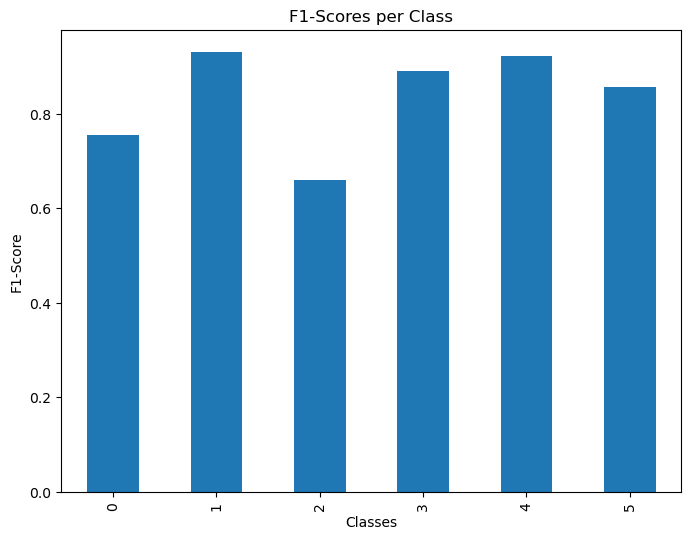

In [ ]:
# 生成分类报告
report = classification_report(y_trinomial_test, y_test_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# 提取每个类别的 F1 分数
f1_scores = df.loc[df.index.isin(y_trinomial_test.unique().astype(str)), 'f1-score']

# 绘制柱状图
plt.figure(figsize=(8, 6))
f1_scores.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Scores per Class')
plt.show()

##### 热力图

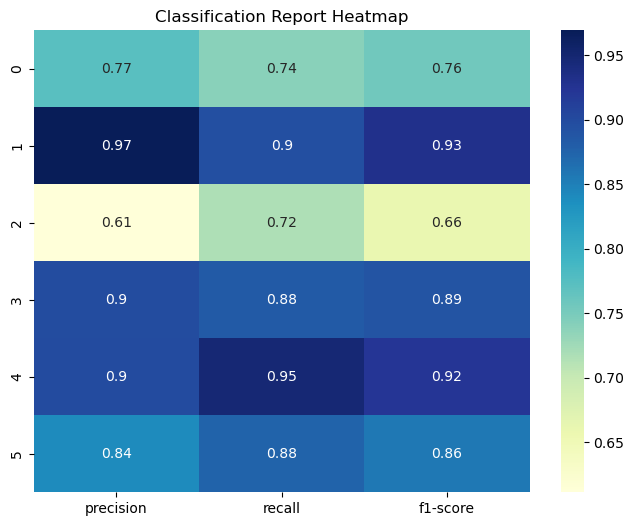

In [ ]:
# 生成分类报告
report = classification_report(y_trinomial_test, y_test_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

# 提取每个类别的精确率、召回率和 F1 分数
heatmap_data = df.loc[df.index.isin(y_trinomial_test.unique().astype(str)), ['precision', 'recall', 'f1-score']]

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()

### K折交叉验证

In [80]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# 假设 X_trinomial_train, y_trinomial_train 已经定义

# 创建管道
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=4)),
    ('classifier', RandomForestClassifier(max_depth=12, random_state=42))
])

# 创建 KFold 对象
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 设置 k=5

# 使用交叉验证评估模型性能
scores = cross_val_score(pipeline, X_trinomial_train, y_trinomial_train, cv=kfold, scoring='accuracy')

# 输出交叉验证结果
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation scores: [0.87890625 0.83529412 0.8627451  0.85490196 0.87843137]
Average accuracy: 0.8620557598039216
Standard deviation: 0.016247690489254805


### SHAP


Accuracy: 85.62%


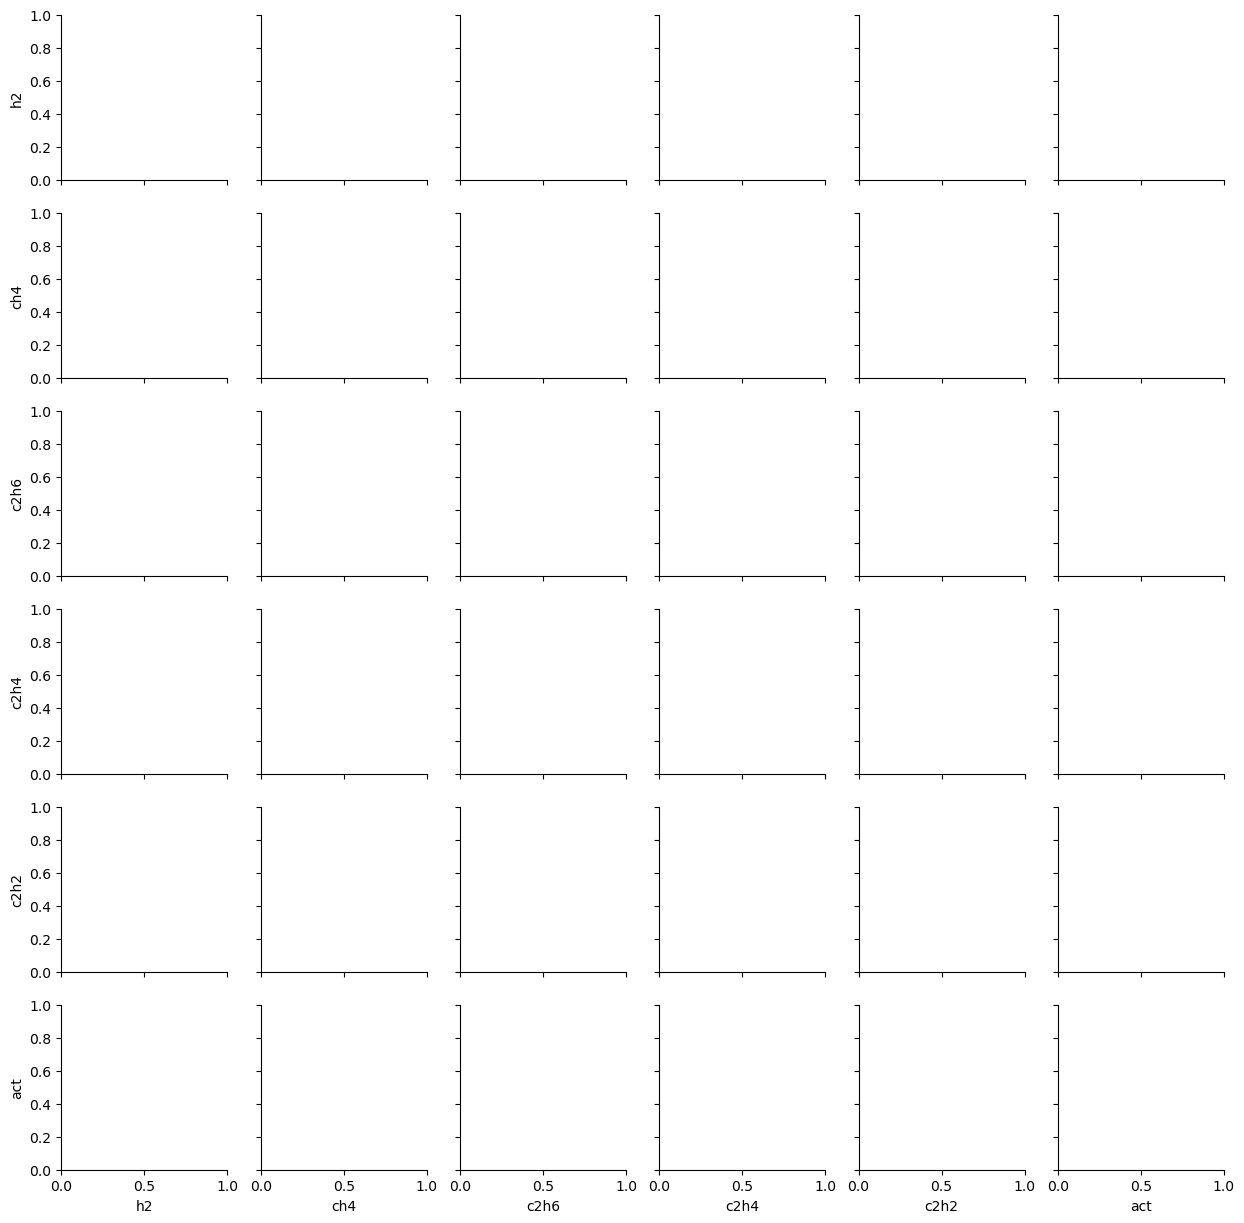

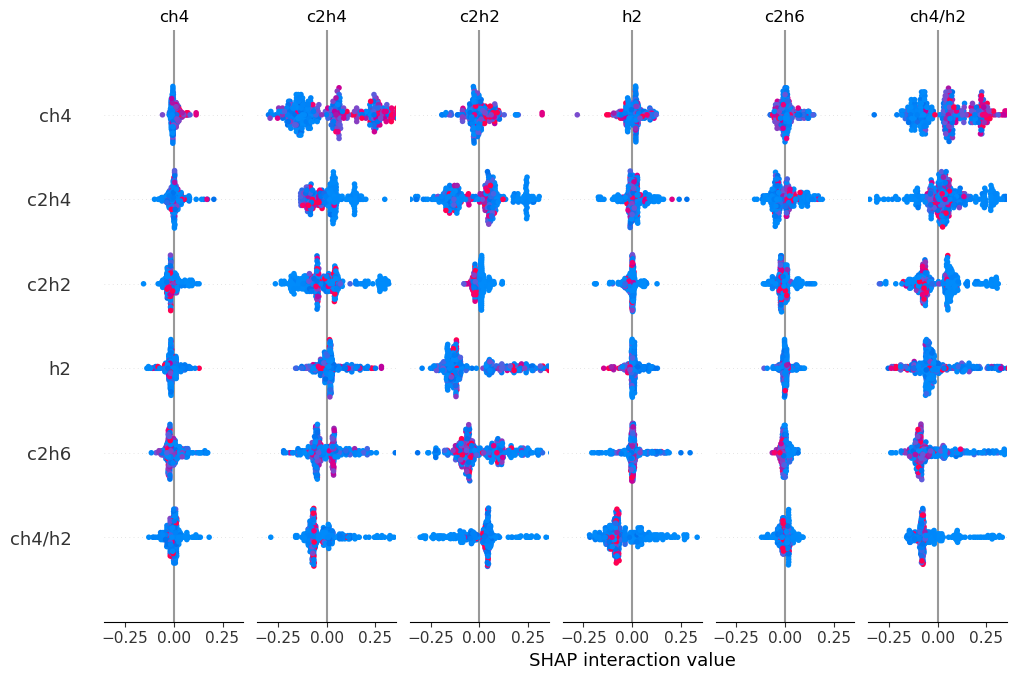

In [81]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 创建 SMOTE + 随机森林的管道
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=9)),
    ('classifier', RandomForestClassifier(max_depth=15, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_train, y_trinomial_train)

# 预测测试集
y_trinomial_t = pipeline.predict(X_trinomial_test)

# 计算准确率
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 提取训练后的随机森林模型
rf_model = pipeline.named_steps['classifier']

# 计算 SHAP 值
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_trinomial_test)

# 画 SHAP 总结图
shap.summary_plot(shap_values, X_trinomial_test)


### SMOTE PSO 83.97%

In [56]:
import optuna
from optuna.samplers import TPESampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the objective function for PSO-based hyperparameter tuning
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=10)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create the pipeline
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42, k_neighbors=9)),  # Oversampling
        ('classifier', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        ))
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_trinomial_train, y_trinomial_train, cv=5, scoring='accuracy')
    return scores.mean()  # Optimize for mean accuracy

# Use PSO-based sampler
sampler = TPESampler(seed=42)  # Tree-structured Parzen Estimator (TPE), close to PSO behavior

# Run optimization
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=20)  # Run 20 iterations

# Get best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

# Train the final model with best parameters
best_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=9)),
    ('classifier', RandomForestClassifier(
        **best_params, random_state=42
    ))
])

best_pipeline.fit(X_trinomial_train, y_trinomial_train)
y_trinomial_pred = best_pipeline.predict(X_trinomial_test)

# Calculate accuracy
accuracy = accuracy_score(y_trinomial_test, y_trinomial_pred)
print("Final Model Accuracy: %.2f%%" % (accuracy * 100.0))


[I 2025-03-04 00:36:39,733] A new study created in memory with name: no-name-e6ce8b96-11c8-4a45-a60a-e5a011b48155
[I 2025-03-04 00:36:45,015] Trial 0 finished with value: 0.7785684450351245 and parameters: {'n_estimators': 140, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7785684450351245.
[I 2025-03-04 00:36:48,285] Trial 1 finished with value: 0.7733282703626354 and parameters: {'n_estimators': 90, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7785684450351245.
[I 2025-03-04 00:36:55,401] Trial 2 finished with value: 0.767233719384849 and parameters: {'n_estimators': 200, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7785684450351245.
[I 2025-03-04 00:37:08,963] Trial 3 finished with value: 0.7846667932409341 and parameters: {'n_estimators': 260, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 3 with value: 0

Best Parameters: {'n_estimators': 120, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 3}
Final Model Accuracy: 83.97%


### SMOTE Genetic Algorithm (GA) 84.67%

In [57]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define evaluation function
def evaluate(individual):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = individual
    
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42, k_neighbors=9)),
        ('classifier', RandomForestClassifier(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        ))
    ])
    
    scores = cross_val_score(pipeline, X_trinomial_train, y_trinomial_train, cv=5, scoring='accuracy')
    return (np.mean(scores),)  # Must return a tuple

# Define GA parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 50, 300)  # n_estimators
toolbox.register("attr_depth", random.randint, 5, 30)  # max_depth
toolbox.register("attr_split", random.randint, 2, 10)  # min_samples_split
toolbox.register("attr_leaf", random.randint, 1, 10)  # min_samples_leaf

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_depth, toolbox.attr_split, toolbox.attr_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operators
toolbox.register("mate", tools.cxTwoPoint)  # Crossover
toolbox.register("mutate", tools.mutUniformInt, low=1, up=300, indpb=0.2)  # Mutation
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Run GA
population = toolbox.population(n=10)  # Population size
result = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)

# Get best parameters
best_individual = tools.selBest(population, k=1)[0]
print("Best Parameters from GA:", best_individual)


gen	nevals
0  	10    
1  	8     
2  	6     
3  	7     
4  	0     
5  	3     
6  	8     
7  	4     
8  	3     
9  	6     
10 	3     
Best Parameters from GA: [95, 27, 2, 3]


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use GA-optimized hyperparameters
best_params = {'n_estimators': 95, 'max_depth': 27, 'min_samples_split': 2, 'min_samples_leaf': 3}

# Train the final RandomForest model
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

rf_best.fit(X_trinomial_train, y_trinomial_train)  # Train with training data

# Predict on test data
y_pred = rf_best.predict(X_trinomial_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_trinomial_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 84.67%


### SMOTE Simulated Annealing (SA) 79.16%

In [11]:
from scipy.optimize import dual_annealing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define evaluation function
def evaluate(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42, k_neighbors=9)),
        ('classifier', RandomForestClassifier(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        ))
    ])
    
    scores = cross_val_score(pipeline, X_trinomial_train, y_trinomial_train, cv=5, scoring='accuracy')
    print(f"Parameters: {params}, Accuracy: {np.mean(scores)}")
    return -np.mean(scores)  # Minimize negative accuracy

# Define parameter bounds
bounds = [(50, 300), (5, 30), (2, 10), (1, 10)]

# Run Simulated Annealing
result = dual_annealing(evaluate, bounds)
best_params = result.x
print("Best Parameters from SA:", best_params)


Parameters: [115.51959561  28.05002687   5.4204224    7.86831512], Accuracy: 0.7794304157964687
Parameters: [162.32799784   7.49461007   4.22882463   1.67671735], Accuracy: 0.7750711980254414
Parameters: [103.98908094  24.15569317   8.87765739   8.32555011], Accuracy: 0.7742206189481677
Parameters: [268.55200683  13.71861907   6.02050992   1.88847601], Accuracy: 0.787275488893108
Parameters: [230.82076172  25.98737396   6.28926481   9.1572309 ], Accuracy: 0.7742054300360736
Parameters: [142.71536079  25.98737396   6.28926481   9.1572309 ], Accuracy: 0.7768255173723183
Parameters: [142.71536079  10.20900062   6.28926481   9.1572309 ], Accuracy: 0.7724662996012911
Parameters: [142.71536079  10.20900062   7.43968217   9.1572309 ], Accuracy: 0.7724662996012911
Parameters: [142.71536079  10.20900062   7.43968217   2.83216448], Accuracy: 0.7846629960129106
Parameters: [268.55200683  13.71861907   6.02050992   1.88847601], Accuracy: 0.787275488893108
Parameters: [268.55200684  13.71861907   6

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use GA-optimized hyperparameters
best_params = {'n_estimators': 101.01237236, 'max_depth': 17.50931, 'min_samples_split': 6.46900474, 'min_samples_leaf': 3.22292711}

# Train the final RandomForest model
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

rf_best.fit(X_trinomial_train, y_trinomial_train)  # Train with training data

# Predict on test data
y_pred = rf_best.predict(X_trinomial_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_trinomial_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Parameters: [101.01237236  17.50931      6.46900474   3.22292711]

### SMOTE Differential Evolution (DE) 83.28%

In [12]:
from scipy.optimize import differential_evolution

# Define evaluation function
def evaluate(params):
    n_estimators, max_depth, min_samples_split, min_samples_leaf = params
    
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42, k_neighbors=9)),
        ('classifier', RandomForestClassifier(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        ))
    ])
    
    scores = cross_val_score(pipeline, X_trinomial_train, y_trinomial_train, cv=5, scoring='accuracy')
    print(f"Parameters: {params}, Mean Accuracy: {np.mean(scores)}")
    return -np.mean(scores)  # Minimize negative accuracy

# Define parameter bounds
bounds = [(50, 300), (5, 30), (2, 10), (1, 10)]

# Run Differential Evolution
result = differential_evolution(evaluate, bounds, strategy='best1bin', mutation=(0.5, 1), recombination=0.7)
best_params = result.x
print("Best Parameters from DE:", best_params)


Parameters: [206.1452231   11.16975887   3.77236529   1.30114522], Mean Accuracy: 0.7820315169925953
Parameters: [274.44840223  28.81255625   6.72479157   4.83095645], Mean Accuracy: 0.7846478071008164
Parameters: [295.86119671  15.49234871   7.47258318   9.55708224], Mean Accuracy: 0.770723371938485
Parameters: [157.5624097   28.65876841   9.3312528    8.11465492], Mean Accuracy: 0.7733472565027529
Parameters: [180.72539762  24.81076847   2.30441794   7.55127123], Mean Accuracy: 0.7794304157964687
Parameters: [81.54778369  6.86254716  8.95305395  5.62590909], Mean Accuracy: 0.7689690525916081
Parameters: [240.98481842  20.37296424   4.35852012   8.7137541 ], Mean Accuracy: 0.7689842415037023
Parameters: [94.82648998 23.9774314   8.2836146   9.28295975], Mean Accuracy: 0.7785608505790773
Parameters: [236.59174125  12.39364097   2.05254783   1.81736919], Mean Accuracy: 0.7924966774254795
Parameters: [150.22476889  27.64438566   8.68325056   6.9268918 ], Mean Accuracy: 0.7803113726979305

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use GA-optimized hyperparameters
best_params = {'n_estimators': 170, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 4}

# Train the final RandomForest model
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

rf_best.fit(X_trinomial_train, y_trinomial_train)  # Train with training data

# Predict on test data
y_pred = rf_best.predict(X_trinomial_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_trinomial_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


# Parameters: [101.01237236  17.50931      6.46900474   3.22292711]

Test Accuracy: 83.28%


|Algorithm |	Pros |	Cons|
| ----------- | ----------- | ----------- |
|GA (Genetic Algorithm)|	Great for large, complex problems	|Computationally expensive|
|SA (Simulated Annealing)|	Avoids local optima well|	Can be slow to converge|
|DE (Differential Evolution)	|Strong global search ability|	Requires careful tuning|

### Borderline-SMOTE 85.71%

In [24]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier

# 创建一个包含 BorderlineSMOTE 和 RandomForestClassifier 的管道
pipeline = Pipeline([
    ('smote', BorderlineSMOTE(random_state=42, k_neighbors=4)),
    ('classifier', RandomForestClassifier(max_depth=12, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_train, y_trinomial_train)

# 预测测试集
y_trinomial_t = pipeline.predict(X_trinomial_test)

# 计算准确率
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.71%


In [64]:
# 测试Borderline-SMOTE的k_neighbors从1到10，以及随机森林深度从1到20的结果
for k in range(1, 11):
    for depth in range(1, 21):
        pipeline = Pipeline([
            ('smote', BorderlineSMOTE(random_state=42, k_neighbors=k)),
            ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))
        ])
        
        # 训练模型
        pipeline.fit(X_trinomial_train, y_trinomial_train)
        
        # 预测测试集
        y_trinomial_t = pipeline.predict(X_trinomial_test)
        
        # 计算准确率
        accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
        print("k_neighbors: %d, Depth: %d, Accuracy: %.2f%%" % (k, depth, accuracy * 100.0))

k_neighbors: 1, Depth: 1, Accuracy: 63.41%
k_neighbors: 1, Depth: 2, Accuracy: 74.22%
k_neighbors: 1, Depth: 3, Accuracy: 80.14%
k_neighbors: 1, Depth: 4, Accuracy: 80.49%
k_neighbors: 1, Depth: 5, Accuracy: 82.58%
k_neighbors: 1, Depth: 6, Accuracy: 82.93%
k_neighbors: 1, Depth: 7, Accuracy: 83.28%
k_neighbors: 1, Depth: 8, Accuracy: 84.67%
k_neighbors: 1, Depth: 9, Accuracy: 84.67%
k_neighbors: 1, Depth: 10, Accuracy: 84.67%
k_neighbors: 1, Depth: 11, Accuracy: 85.37%
k_neighbors: 1, Depth: 12, Accuracy: 85.37%
k_neighbors: 1, Depth: 13, Accuracy: 83.62%
k_neighbors: 1, Depth: 14, Accuracy: 85.02%
k_neighbors: 1, Depth: 15, Accuracy: 83.97%
k_neighbors: 1, Depth: 16, Accuracy: 84.32%
k_neighbors: 1, Depth: 17, Accuracy: 84.32%
k_neighbors: 1, Depth: 18, Accuracy: 83.97%
k_neighbors: 1, Depth: 19, Accuracy: 84.32%
k_neighbors: 1, Depth: 20, Accuracy: 84.67%
k_neighbors: 2, Depth: 1, Accuracy: 66.55%
k_neighbors: 2, Depth: 2, Accuracy: 74.56%
k_neighbors: 2, Depth: 3, Accuracy: 78.40%


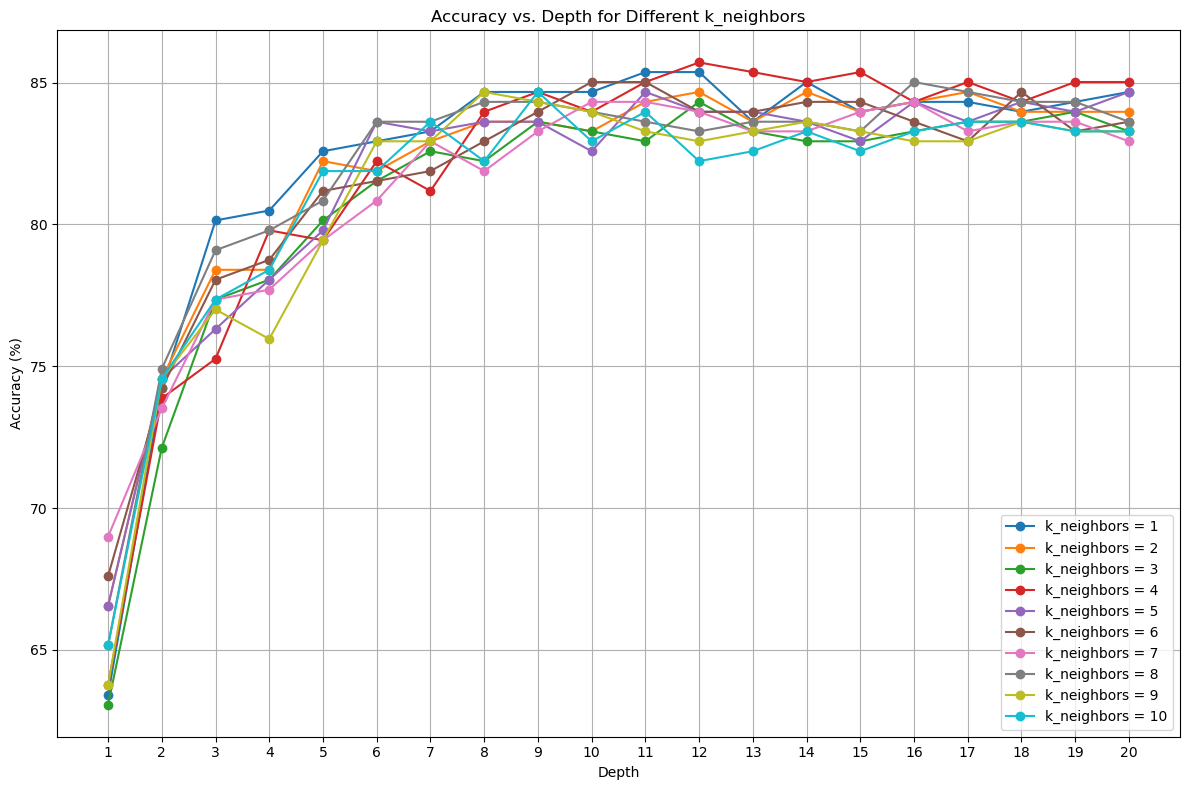

In [65]:
import matplotlib.pyplot as plt

def plot_all_accuracies(filename="RFC_Borderline-SMOTE.txt"):
    """
    将所有 k_neighbors 对应的准确率折线图绘制在同一张图上。

    Args:
        filename (str): 文件名。
    """

    data = {}
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                k_neighbors, depth, accuracy = line.split(", ")
                k_neighbors = int(k_neighbors.split(": ")[1])
                depth = int(depth.split(": ")[1])
                accuracy = float(accuracy.split(": ")[1].replace("%", ""))

                if k_neighbors not in data:
                    data[k_neighbors] = {"depths": [], "accuracies": []}

                data[k_neighbors]["depths"].append(depth)
                data[k_neighbors]["accuracies"].append(accuracy)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap("tab10").colors  # 使用 tab10 色彩映射获取 10 种颜色

    for i, (k, values) in enumerate(data.items()):
        plt.plot(values["depths"], values["accuracies"], marker='o', label=f"k_neighbors = {k}", color=colors[i])

    plt.title("Accuracy vs. Depth for Different k_neighbors")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.legend()  # 添加图例
    plt.xticks(list(range(1, 21)))  # 设置 x 轴刻度为 1 到 20
    plt.tight_layout()
    plt.show()

# 调用函数绘制折线图
plot_all_accuracies()

### ADASYN 86.41%

In [25]:
from imblearn.over_sampling import ADASYN

# 创建一个包含 ADASYN 和 RandomForestClassifier 的管道
pipeline = Pipeline([
    ('smote', ADASYN(random_state=42, n_neighbors=1)),
    ('classifier', RandomForestClassifier(max_depth=11, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_train, y_trinomial_train)

# 预测测试集
y_trinomial_t = pipeline.predict(X_trinomial_test)

# 计算准确率
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 86.41%


In [68]:
# 测试ADASYN的k_neighbors从1到10，以及随机森林深度从1到20的结果
for k in range(1, 11):
    for depth in range(1, 21):
        pipeline = Pipeline([
            ('smote', ADASYN(random_state=42, n_neighbors=k)),
            ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))
        ])
        
        # 训练模型
        pipeline.fit(X_trinomial_train, y_trinomial_train)
        
        # 预测测试集
        y_trinomial_t = pipeline.predict(X_trinomial_test)
        
        # 计算准确率
        accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
        print("k_neighbors: %d, Depth: %d, Accuracy: %.2f%%" % (k, depth, accuracy * 100.0))

k_neighbors: 1, Depth: 1, Accuracy: 58.89%
k_neighbors: 1, Depth: 2, Accuracy: 72.82%
k_neighbors: 1, Depth: 3, Accuracy: 79.09%
k_neighbors: 1, Depth: 4, Accuracy: 81.88%
k_neighbors: 1, Depth: 5, Accuracy: 82.23%
k_neighbors: 1, Depth: 6, Accuracy: 82.93%
k_neighbors: 1, Depth: 7, Accuracy: 81.88%
k_neighbors: 1, Depth: 8, Accuracy: 84.67%
k_neighbors: 1, Depth: 9, Accuracy: 83.97%
k_neighbors: 1, Depth: 10, Accuracy: 84.67%
k_neighbors: 1, Depth: 11, Accuracy: 86.41%
k_neighbors: 1, Depth: 12, Accuracy: 86.06%
k_neighbors: 1, Depth: 13, Accuracy: 85.37%
k_neighbors: 1, Depth: 14, Accuracy: 85.02%
k_neighbors: 1, Depth: 15, Accuracy: 85.71%
k_neighbors: 1, Depth: 16, Accuracy: 85.71%
k_neighbors: 1, Depth: 17, Accuracy: 86.06%
k_neighbors: 1, Depth: 18, Accuracy: 86.41%
k_neighbors: 1, Depth: 19, Accuracy: 86.41%
k_neighbors: 1, Depth: 20, Accuracy: 86.41%
k_neighbors: 2, Depth: 1, Accuracy: 61.32%
k_neighbors: 2, Depth: 2, Accuracy: 73.17%
k_neighbors: 2, Depth: 3, Accuracy: 79.44%


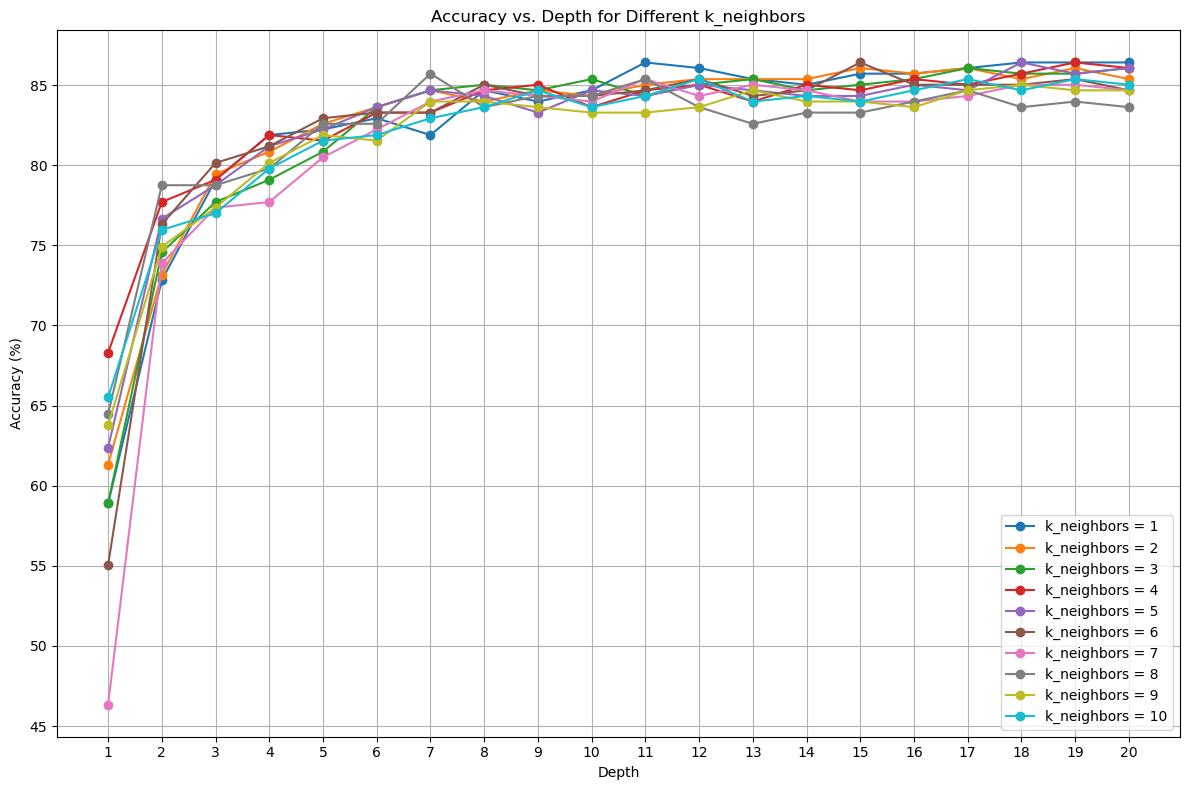

In [69]:
import matplotlib.pyplot as plt

def plot_all_accuracies(filename="RFC_ADASYN.txt"):
    """
    将所有 k_neighbors 对应的准确率折线图绘制在同一张图上。

    Args:
        filename (str): 文件名。
    """

    data = {}
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                k_neighbors, depth, accuracy = line.split(", ")
                k_neighbors = int(k_neighbors.split(": ")[1])
                depth = int(depth.split(": ")[1])
                accuracy = float(accuracy.split(": ")[1].replace("%", ""))

                if k_neighbors not in data:
                    data[k_neighbors] = {"depths": [], "accuracies": []}

                data[k_neighbors]["depths"].append(depth)
                data[k_neighbors]["accuracies"].append(accuracy)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap("tab10").colors  # 使用 tab10 色彩映射获取 10 种颜色

    for i, (k, values) in enumerate(data.items()):
        plt.plot(values["depths"], values["accuracies"], marker='o', label=f"k_neighbors = {k}", color=colors[i])

    plt.title("Accuracy vs. Depth for Different k_neighbors")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.legend()  # 添加图例
    plt.xticks(list(range(1, 21)))  # 设置 x 轴刻度为 1 到 20
    plt.tight_layout()
    plt.show()

# 调用函数绘制折线图
plot_all_accuracies()

### KMeansSMOTE 85.02%

In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import KMeansSMOTE
from sklearn.ensemble import RandomForestClassifier

# 创建一个包含 KMeansSMOTE 和 RandomForestClassifier 的管道
pipeline = Pipeline([
    ('smote', KMeansSMOTE(random_state=42, k_neighbors=1)),
    ('classifier', RandomForestClassifier(max_depth=16, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_train, y_trinomial_train)

# 预测测试集
y_trinomial_t = pipeline.predict(X_trinomial_test)

# 计算准确率
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.02%


In [30]:
# 测试SMOTE的k_neighbors从1到10，以及随机森林深度从1到20的结果
for k in range(1, 4):
    for depth in range(1, 21):
        pipeline = Pipeline([
            ('smote', KMeansSMOTE(random_state=42, k_neighbors=k)),
            ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))
        ])
        
        # 训练模型
        pipeline.fit(X_trinomial_train, y_trinomial_train)
        
        # 预测测试集
        y_trinomial_t = pipeline.predict(X_trinomial_test)
        
        # 计算准确率
        accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
        print("k_neighbors: %d, Depth: %d, Accuracy: %.2f%%" % (k, depth, accuracy * 100.0))

k_neighbors: 1, Depth: 1, Accuracy: 42.51%
k_neighbors: 1, Depth: 2, Accuracy: 71.78%
k_neighbors: 1, Depth: 3, Accuracy: 76.66%
k_neighbors: 1, Depth: 4, Accuracy: 77.70%
k_neighbors: 1, Depth: 5, Accuracy: 81.18%
k_neighbors: 1, Depth: 6, Accuracy: 81.53%
k_neighbors: 1, Depth: 7, Accuracy: 83.28%
k_neighbors: 1, Depth: 8, Accuracy: 83.62%
k_neighbors: 1, Depth: 9, Accuracy: 84.32%
k_neighbors: 1, Depth: 10, Accuracy: 84.32%
k_neighbors: 1, Depth: 11, Accuracy: 85.02%
k_neighbors: 1, Depth: 12, Accuracy: 84.67%
k_neighbors: 1, Depth: 13, Accuracy: 84.32%
k_neighbors: 1, Depth: 14, Accuracy: 83.97%
k_neighbors: 1, Depth: 15, Accuracy: 84.32%
k_neighbors: 1, Depth: 16, Accuracy: 85.02%
k_neighbors: 1, Depth: 17, Accuracy: 84.67%
k_neighbors: 1, Depth: 18, Accuracy: 84.32%
k_neighbors: 1, Depth: 19, Accuracy: 84.32%
k_neighbors: 1, Depth: 20, Accuracy: 84.32%
k_neighbors: 2, Depth: 1, Accuracy: 42.16%
k_neighbors: 2, Depth: 2, Accuracy: 75.26%
k_neighbors: 2, Depth: 3, Accuracy: 76.31%


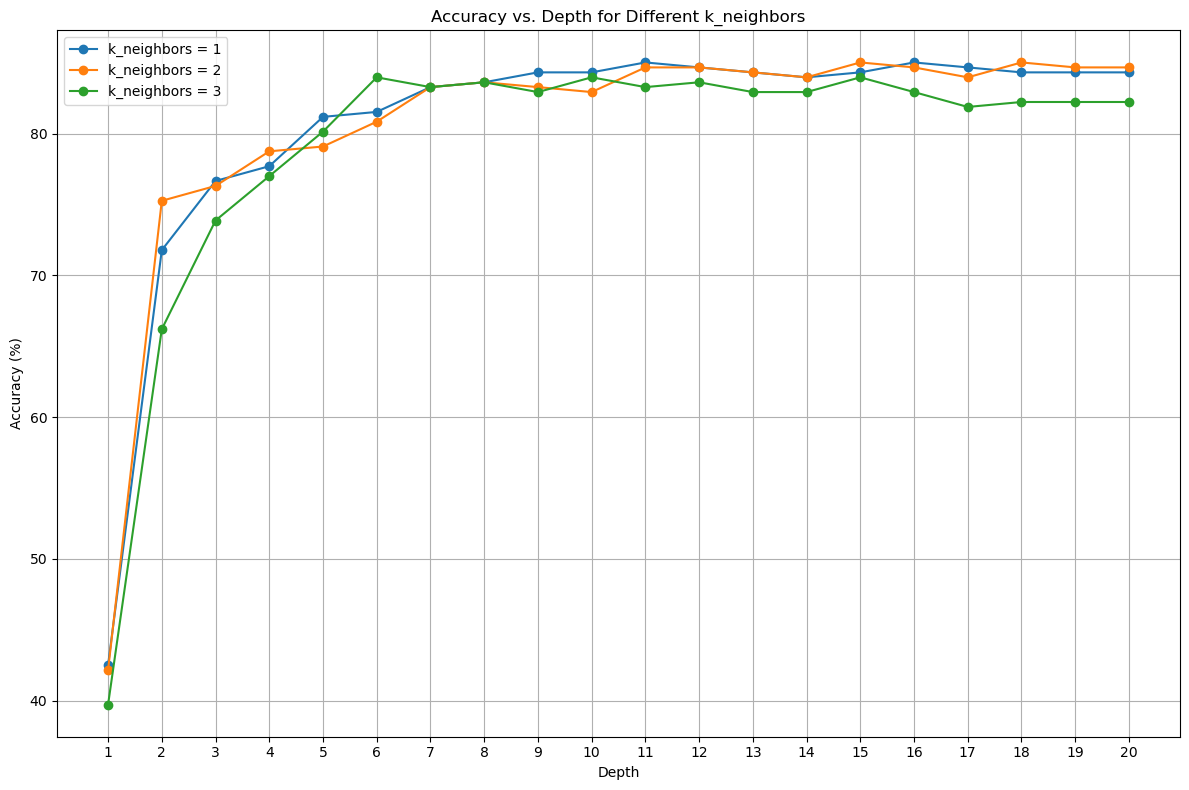

In [31]:
import matplotlib.pyplot as plt

def plot_all_accuracies(filename="RFC_KMeansSMOTE.txt"):
    """
    将所有 k_neighbors 对应的准确率折线图绘制在同一张图上。

    Args:
        filename (str): 文件名。
    """

    data = {}
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                k_neighbors, depth, accuracy = line.split(", ")
                k_neighbors = int(k_neighbors.split(": ")[1])
                depth = int(depth.split(": ")[1])
                accuracy = float(accuracy.split(": ")[1].replace("%", ""))

                if k_neighbors not in data:
                    data[k_neighbors] = {"depths": [], "accuracies": []}

                data[k_neighbors]["depths"].append(depth)
                data[k_neighbors]["accuracies"].append(accuracy)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap("tab10").colors  # 使用 tab10 色彩映射获取 10 种颜色

    for i, (k, values) in enumerate(data.items()):
        plt.plot(values["depths"], values["accuracies"], marker='o', label=f"k_neighbors = {k}", color=colors[i])

    plt.title("Accuracy vs. Depth for Different k_neighbors")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.legend()  # 添加图例
    plt.xticks(list(range(1, 21)))  # 设置 x 轴刻度为 1 到 20
    plt.tight_layout()
    plt.show()

# 调用函数绘制折线图
plot_all_accuracies()

### PCA

### 标准化处理数据的随机森林 84.32%

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trinomial_ts = scaler.fit_transform(X_trinomial_train)
X_trinomial_tes = scaler.transform(X_trinomial_test)
# X_trinomial_tes

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 假设 X_train, y_train, X_test, y_test 已经定义

clf = RandomForestClassifier(max_depth=11, random_state=42)

clf.fit(X_trinomial_ts, y_trinomial_train)

y_trinomial_t = clf.predict(X_trinomial_tes)
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 82.93%


Accuracy: 77.75%


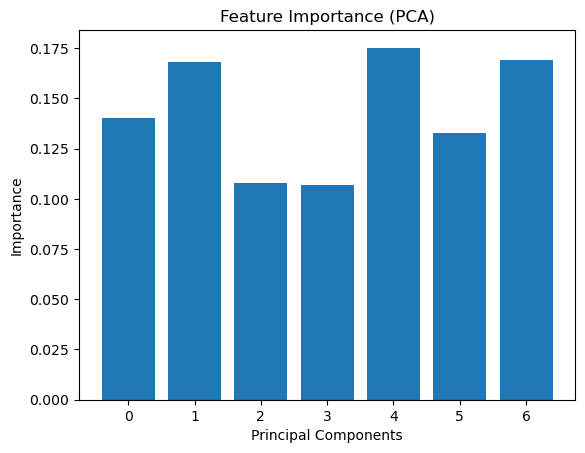

Principal Component 1: 0.1400
Principal Component 2: 0.1683
Principal Component 3: 0.1077
Principal Component 4: 0.1070
Principal Component 5: 0.1752
Principal Component 6: 0.1327
Principal Component 7: 0.1690


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假设 X_trinomial_train, y_trinomial_train, X_trinomial_test, y_trinomial_test 已经定义

# 创建 PCA 对象，并进行降维 (例如，保留 95% 的方差)
pca = PCA(n_components=0.95) # 或者指定保留的主成分数量：pca = PCA(n_components=10)
X_trinomial_ts_pca = pca.fit_transform(X_trinomial_ts)
X_trinomial_tes_pca = pca.transform(X_trinomial_tes) # 使用相同的 PCA 对象

# 训练随机森林模型
clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(X_trinomial_ts_pca, y_trinomial_train)

# 预测测试集
y_trinomial_tes = clf.predict(X_trinomial_tes_pca)
accuracy = accuracy_score(y_trinomial_tes, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 获取特征重要性 (注意：特征重要性现在对应于 PCA 后的主成分)
importance = clf.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xlabel("Principal Components") # 修改 x 轴标签
plt.ylabel("Importance")
plt.title("Feature Importance (PCA)") # 修改标题
plt.show()

# 打印特征重要性
for i in range(len(importance)):
    print(f"Principal Component {i+1}: {importance[i]:.4f}") # 修改输出

In [44]:

# 获取特征重要性
importance = clf.feature_importances_


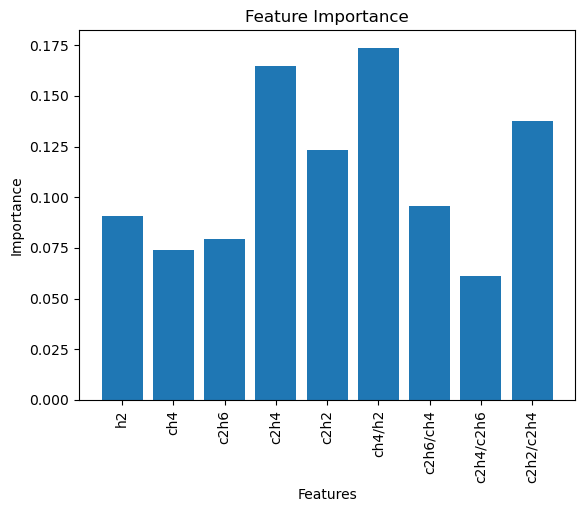

h2: 0.0909
ch4: 0.0741
c2h6: 0.0792
c2h4: 0.1648
c2h2: 0.1232
ch4/h2: 0.1737
c2h6/ch4: 0.0956
c2h4/c2h6: 0.0609
c2h2/c2h4: 0.1376


In [45]:

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_trinomial_train.columns, rotation='vertical')  # X_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_trinomial_train.columns):
    print(f"{feature}: {importance[i]:.4f}")


In [46]:
for i in range(1,20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_trinomial_ts, y_trinomial_train)
    y_trinomial_t = clf.predict(X_trinomial_tes)
    accuracy_trinomial = accuracy_score(y_trinomial_t,y_trinomial_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy_trinomial * 100.0))

Depth: 1, Accuracy: 45.99%
Depth: 2, Accuracy: 65.51%
Depth: 3, Accuracy: 71.78%
Depth: 4, Accuracy: 75.96%
Depth: 5, Accuracy: 78.40%
Depth: 6, Accuracy: 80.14%
Depth: 7, Accuracy: 82.58%
Depth: 8, Accuracy: 82.23%
Depth: 9, Accuracy: 80.84%
Depth: 10, Accuracy: 81.53%
Depth: 11, Accuracy: 82.93%
Depth: 12, Accuracy: 82.58%
Depth: 13, Accuracy: 82.58%
Depth: 14, Accuracy: 81.88%
Depth: 15, Accuracy: 82.23%
Depth: 16, Accuracy: 81.53%
Depth: 17, Accuracy: 82.58%
Depth: 18, Accuracy: 81.88%
Depth: 19, Accuracy: 82.23%


In [51]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 创建一个包含 SMOTE 和 RandomForestClassifier 的管道
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=7)),
    ('classifier', RandomForestClassifier(max_depth=13, random_state=42))
])

# 训练模型
pipeline.fit(X_trinomial_ts, y_trinomial_train)

# 预测测试集
y_trinomial_t = pipeline.predict(X_trinomial_tes)

# 计算准确率
accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.32%


In [49]:
# 测试SMOTE的k_neighbors从1到10，以及随机森林深度从1到20的结果
for k in range(1, 11):
    for depth in range(1, 21):
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=42, k_neighbors=k)),
            ('classifier', RandomForestClassifier(max_depth=depth, random_state=42))
        ])
        
        # 训练模型
        pipeline.fit(X_trinomial_ts, y_trinomial_train)
        
        # 预测测试集
        y_trinomial_t = pipeline.predict(X_trinomial_tes)
        
        # 计算准确率
        accuracy = accuracy_score(y_trinomial_t, y_trinomial_test)
        print("k_neighbors: %d, Depth: %d, Accuracy: %.2f%%" % (k, depth, accuracy * 100.0))

k_neighbors: 1, Depth: 1, Accuracy: 53.66%
k_neighbors: 1, Depth: 2, Accuracy: 69.34%
k_neighbors: 1, Depth: 3, Accuracy: 71.08%
k_neighbors: 1, Depth: 4, Accuracy: 71.43%
k_neighbors: 1, Depth: 5, Accuracy: 74.56%
k_neighbors: 1, Depth: 6, Accuracy: 78.75%
k_neighbors: 1, Depth: 7, Accuracy: 79.44%
k_neighbors: 1, Depth: 8, Accuracy: 80.84%
k_neighbors: 1, Depth: 9, Accuracy: 82.23%
k_neighbors: 1, Depth: 10, Accuracy: 79.79%
k_neighbors: 1, Depth: 11, Accuracy: 80.84%
k_neighbors: 1, Depth: 12, Accuracy: 81.18%
k_neighbors: 1, Depth: 13, Accuracy: 81.53%
k_neighbors: 1, Depth: 14, Accuracy: 81.88%
k_neighbors: 1, Depth: 15, Accuracy: 81.88%
k_neighbors: 1, Depth: 16, Accuracy: 81.18%
k_neighbors: 1, Depth: 17, Accuracy: 81.53%
k_neighbors: 1, Depth: 18, Accuracy: 81.53%
k_neighbors: 1, Depth: 19, Accuracy: 80.84%
k_neighbors: 1, Depth: 20, Accuracy: 81.53%
k_neighbors: 2, Depth: 1, Accuracy: 52.61%
k_neighbors: 2, Depth: 2, Accuracy: 70.73%
k_neighbors: 2, Depth: 3, Accuracy: 71.78%


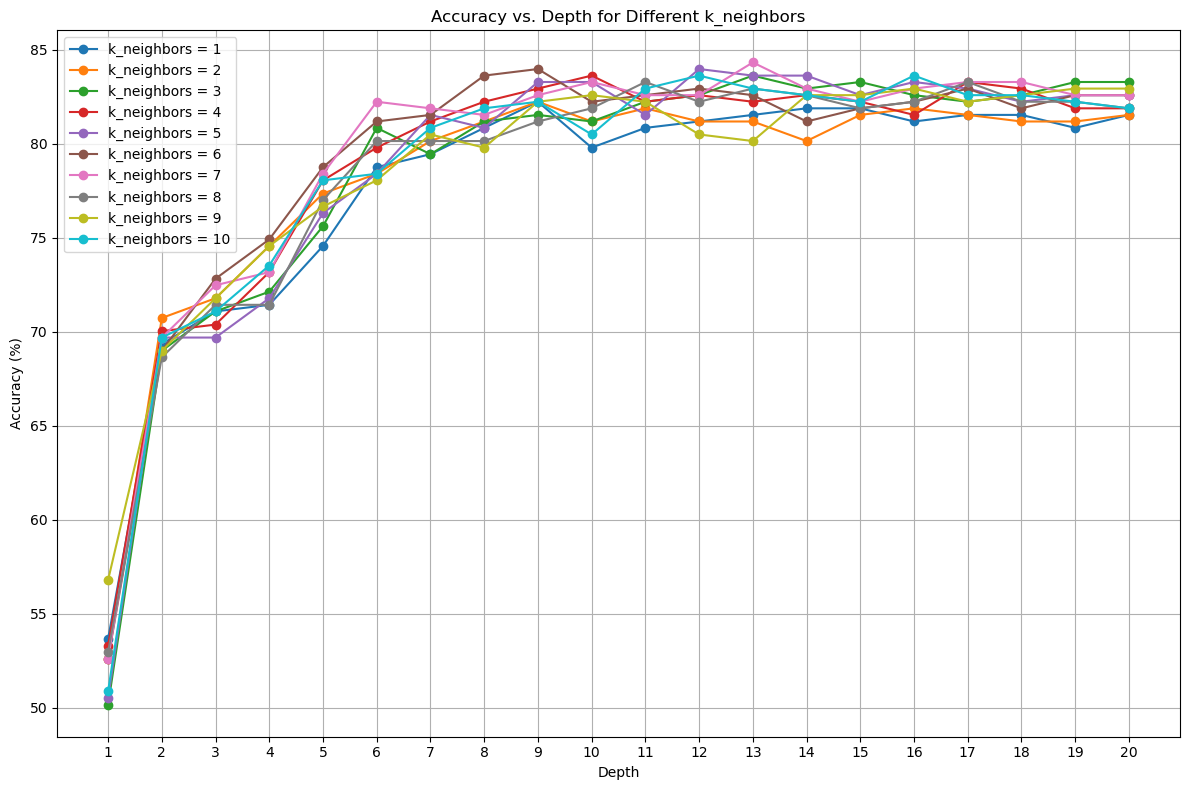

In [50]:
import matplotlib.pyplot as plt

def plot_all_accuracies(filename="RFC_SMOTE_s.txt"):
    """
    将所有 k_neighbors 对应的准确率折线图绘制在同一张图上。

    Args:
        filename (str): 文件名。
    """

    data = {}
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                k_neighbors, depth, accuracy = line.split(", ")
                k_neighbors = int(k_neighbors.split(": ")[1])
                depth = int(depth.split(": ")[1])
                accuracy = float(accuracy.split(": ")[1].replace("%", ""))

                if k_neighbors not in data:
                    data[k_neighbors] = {"depths": [], "accuracies": []}

                data[k_neighbors]["depths"].append(depth)
                data[k_neighbors]["accuracies"].append(accuracy)

    plt.figure(figsize=(12, 8))
    colors = plt.cm.get_cmap("tab10").colors  # 使用 tab10 色彩映射获取 10 种颜色

    for i, (k, values) in enumerate(data.items()):
        plt.plot(values["depths"], values["accuracies"], marker='o', label=f"k_neighbors = {k}", color=colors[i])

    plt.title("Accuracy vs. Depth for Different k_neighbors")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.legend()  # 添加图例
    plt.xticks(list(range(1, 21)))  # 设置 x 轴刻度为 1 到 20
    plt.tight_layout()
    plt.show()

# 调用函数绘制折线图
plot_all_accuracies()

## 投票集成（Voting Ensemble）

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 初始化模型
knn = KNeighborsClassifier(n_neighbors=1)
xgb = XGBClassifier(learning_rate=0.05, n_estimators=700, max_depth=6, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='multi:softprob', nthread=8, scale_pos_weight=2, seed=27)
rf = RandomForestClassifier(max_depth=8, random_state=42)

# 创建投票集成模型
ensemble = VotingClassifier(estimators=[('knn', knn), ('xgb', xgb), ('rf', rf)], voting='hard')  # 'hard' 表示硬投票

# 训练模型
ensemble.fit(X_trinomial_train, y_trinomial_train)

# 预测
y_pred_ensemble = ensemble.predict(X_trinomial_test)

# 评估
accuracy_ensemble = accuracy_score(y_trinomial_test, y_pred_ensemble)
print("Voting Ensemble Accuracy: %.2f%%" % (accuracy_ensemble * 100.0))

Voting Ensemble Accuracy: 86.41%


# 大卫三角法：C2H2/C2H4,CH4/H2,C2H6/C2H2

## 大卫三角法特征生成

In [70]:
import pandas as pd
import numpy as np

# 假设 X 是一个 Pandas DataFrame，包含 h2, ch4, c2h6, c2h4, c2h2 列

X_david = X.copy()

def david_triangle_features(X):
    """
    根据大卫三角法扩展特征矩阵。

    Args:
        X (pd.DataFrame): 包含 h2, ch4, c2h6, c2h4, c2h2 列的特征矩阵。

    Returns:
        pd.DataFrame: 扩展后的特征矩阵。
    """

    # 计算比值
    R1 = X['c2h2'] / X['c2h4']
    R2 = X['ch4'] / X['h2']
    R3 = X['c2h6'] / X['c2h2']

    # 处理异常值
    R1 = R1.replace([np.inf, -np.inf], 0).fillna(0)
    R2 = R2.replace([np.inf, -np.inf], 0).fillna(0)
    R3 = R3.replace([np.inf, -np.inf], 0).fillna(0)

    # 添加到特征矩阵
    X['R1: C2H2/C2H4'] = R1
    X['R2: CH4/H2'] = R2
    X['R3: C2H6/C2H2'] = R3

    return X

# 示例用法
# 假设 X_train 和 X_test 是你的训练集和测试集
X_david = david_triangle_features(X_david)

# 现在 X_train_extended 和 X_test_extended 包含了扩展后的特征
print(X_david)

           h2     ch4   c2h6    c2h4     c2h2  R1: C2H2/C2H4  R2: CH4/H2  \
0      294.00   27.40   5.60   52.60  338.000       6.425856    0.093197   
1      200.83   59.45  41.00   40.48  150.840       3.726285    0.296022   
2       71.60   20.20   2.70   34.60   44.200       1.277457    0.282123   
3       29.30   24.90   7.30   11.40    7.500       0.657895    0.849829   
4     1170.00  255.00  18.00  312.00  325.000       1.041667    0.217949   
...       ...     ...    ...     ...      ...            ...         ...   
1429   197.00   12.00   6.60   15.00    0.001       0.000067    0.060914   
1430   980.00   73.00  58.00   12.00    0.000       0.000000    0.074490   
1431    44.63   35.36   7.59    1.68    0.000       0.000000    0.792292   
1432   743.00   74.00  39.00    6.00    0.000       0.000000    0.099596   
1433   106.00    4.00   2.00    1.00    0.001       0.001000    0.037736   

      R3: C2H6/C2H2  
0          0.016568  
1          0.271811  
2          0.061086  

## 划分训练集与测试集

In [71]:
from sklearn.model_selection import train_test_split

# 划分大卫三角法的训练集与测试集
X_david_train, X_david_test, y_david_train, y_david_test = train_test_split(X_david, y, test_size=0.2, random_state=42) #test_size=0.2 代表测试集占百分之20

## KNN 65.85%

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 使用 KNN 进行分类

# 创建 KNN 分类器
classifier = KNeighborsClassifier(n_neighbors=1)

# 训练模型
classifier.fit(X_david_train, y_david_train)

# 预测测试集
y_david_pred = classifier.predict(X_david_test)

# 评估 KNN 模型
result_david = confusion_matrix(y_david_test, y_david_pred)
print("Confusion Matrix:")
print(result_david)

result1_david = classification_report(y_david_test, y_david_pred)
print("Classification Report:")
print(result1_david)

result2_david = accuracy_score(y_david_test, y_david_pred)
print("Accuracy:", result2_david)

Confusion Matrix:
[[34  6  7  0  0  0]
 [ 5 76  2  8  5  1]
 [ 7  2 21  1  0  2]
 [ 3  8  1 30  3  2]
 [ 2  9  0  8 20  2]
 [ 0  2  5  6  1  8]]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.72      0.69        47
           2       0.74      0.78      0.76        97
           3       0.58      0.64      0.61        33
           4       0.57      0.64      0.60        47
           5       0.69      0.49      0.57        41
           6       0.53      0.36      0.43        22

    accuracy                           0.66       287
   macro avg       0.63      0.61      0.61       287
weighted avg       0.66      0.66      0.65       287

Accuracy: 0.6585365853658537


C:\Users\11094\AppData\Local\Temp\ipykernel_18504\4183353104.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result_david.importances[sorted_idx_david].T, vert=False, labels=X_david_test.columns[sorted_idx_david])


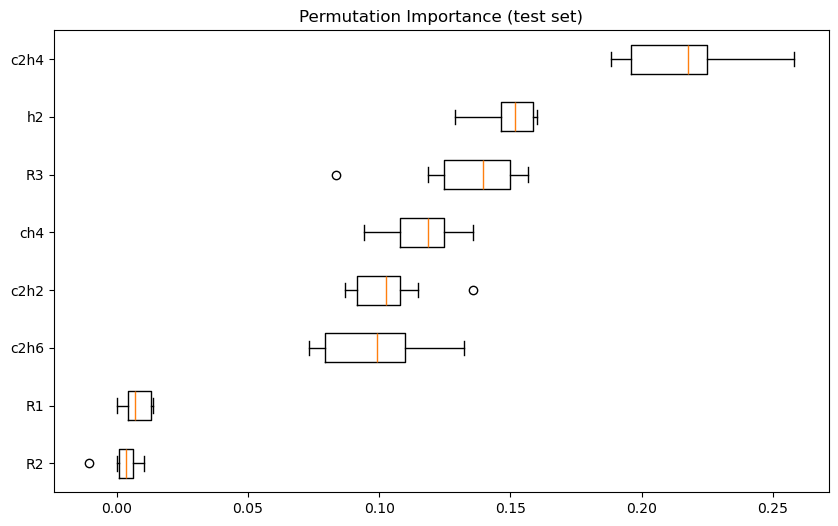

R2: 0.0028
R1: 0.0077
c2h6: 0.0969
c2h2: 0.1035
ch4: 0.1171
R3: 0.1345
h2: 0.1491
c2h4: 0.2167


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 假设 X_david_train, y_david_train, X_david_test, y_david_test 已经定义

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_david_train, y_david_train)

result_david = permutation_importance(classifier, X_david_test, y_david_test, n_repeats=10, random_state=42)

sorted_idx_david = result_david.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result_david.importances[sorted_idx_david].T, vert=False, labels=X_david_test.columns[sorted_idx_david])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx_david:
    print(f"{X_david_train.columns[i]}: {result_david.importances_mean[i]:.4f}")

## 标准化处理KNN 74.91%

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 标准化数据
scaler = StandardScaler()
X_david_train_scaled = scaler.fit_transform(X_david_train)
X_david_test_scaled = scaler.transform(X_david_test)

# 使用 KNN 进行分类
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_david_train_scaled, y_david_train)
y_david_pred_scaled = classifier.predict(X_david_test_scaled)

# 评估 KNN 模型
result_david_scaled = confusion_matrix(y_david_test, y_david_pred_scaled)
print("Confusion Matrix:")
print(result_david_scaled)

result1_david_scaled = classification_report(y_david_test, y_david_pred_scaled)
print("Classification Report:")
print(result1_david_scaled)

result2_david_scaled = accuracy_score(y_david_test, y_david_pred_scaled)
print("Accuracy:", result2_david_scaled)

Confusion Matrix:
[[33  3 10  1  0  0]
 [ 3 87  0  2  5  0]
 [ 7  3 18  1  0  4]
 [ 1  4  3 34  3  2]
 [ 1  7  0  5 28  0]
 [ 0  0  4  2  1 15]]
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.70      0.72        47
           2       0.84      0.90      0.87        97
           3       0.51      0.55      0.53        33
           4       0.76      0.72      0.74        47
           5       0.76      0.68      0.72        41
           6       0.71      0.68      0.70        22

    accuracy                           0.75       287
   macro avg       0.72      0.71      0.71       287
weighted avg       0.75      0.75      0.75       287

Accuracy: 0.7491289198606271


C:\Users\11094\AppData\Local\Temp\ipykernel_18504\518537336.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result_david_scaled.importances[sorted_idx_david_scaled].T, vert=False, labels=X_david_test.columns[sorted_idx_david_scaled])


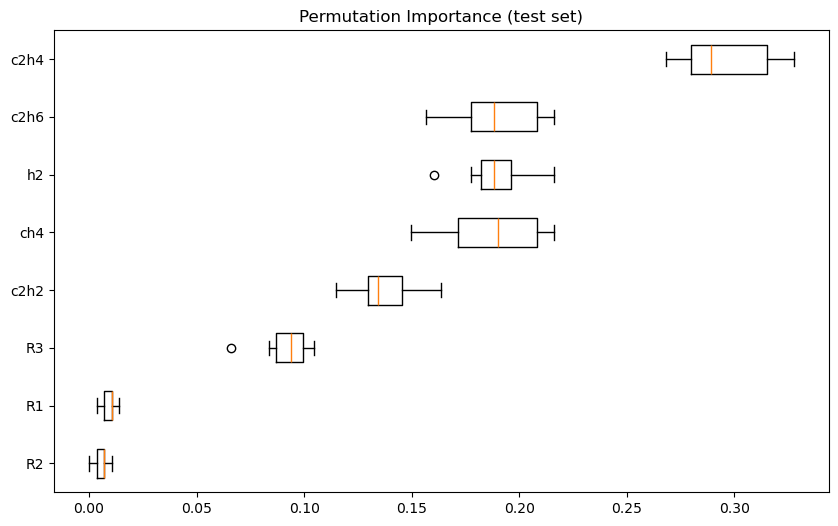

R2: 0.0056
R1: 0.0091
R3: 0.0913
c2h2: 0.1369
ch4: 0.1878
h2: 0.1889
c2h6: 0.1906
c2h4: 0.2965


In [11]:
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt

# 计算置换重要性
result_david_scaled = permutation_importance(classifier, X_david_test_scaled, y_david_test, n_repeats=10, random_state=42)

# 排序特征重要性
sorted_idx_david_scaled = result_david_scaled.importances_mean.argsort()

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.boxplot(result_david_scaled.importances[sorted_idx_david_scaled].T, vert=False, labels=X_david_test.columns[sorted_idx_david_scaled])
plt.title("Permutation Importance (test set)")
plt.show()

# 打印特征重要性
for i in sorted_idx_david_scaled:
    print(f"{X_david_test.columns[i]}: {result_david_scaled.importances_mean[i]:.4f}")

## XGBClassifier 83.62%

In [66]:
from xgboost.sklearn import XGBClassifier

xgb1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=700,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softprob',
 nthread=8,
 scale_pos_weight=2,
 seed=27)

In [72]:
y_david_train = y_david_train - 1
y_david_test = y_david_test - 1

In [73]:
xgb1.fit(X_david_train, y_david_train)

preds_david = xgb1.predict(X_david_test)  # 输出类别
accuracy_david = accuracy_score(preds_david, y_david_test)  # 计算准确率
print("Accuracy: %.2f%%" % (accuracy_david * 100.0))


C:\Users\11094\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [23:06:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 83.62%


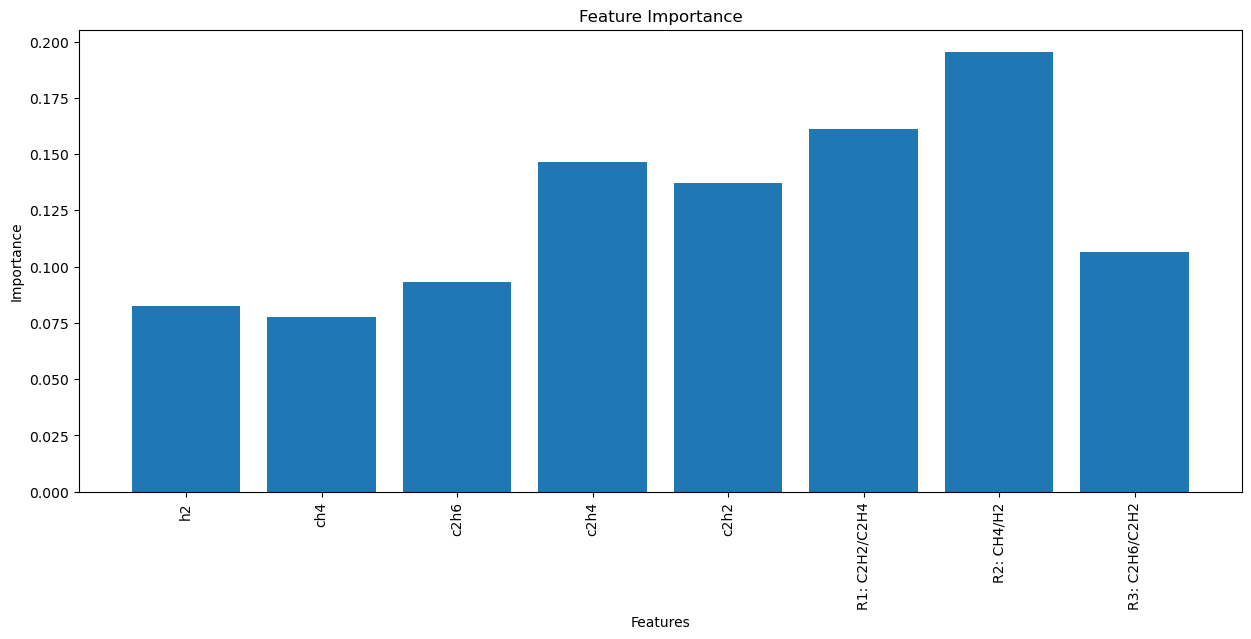

h2: 0.0824
ch4: 0.0777
c2h6: 0.0932
c2h4: 0.1464
c2h2: 0.1374
R1: C2H2/C2H4: 0.1610
R2: CH4/H2: 0.1955
R3: C2H6/C2H2: 0.1065


In [74]:
# 特征重要性
import xgboost as xgb
import matplotlib.pyplot as plt

# 获取特征重要性（使用 "gain"）
importance = xgb1.feature_importances_

# 可视化特征重要性
# 设定图片尺寸
plt.figure(figsize=(15, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_david_train.columns, rotation='vertical') # X_david_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_david_train.columns):
    print(f"{feature}: {importance[i]:.4f}")


C:\Users\11094\AppData\Local\Temp\ipykernel_17580\1240023655.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_david_test.columns[sorted_idx])


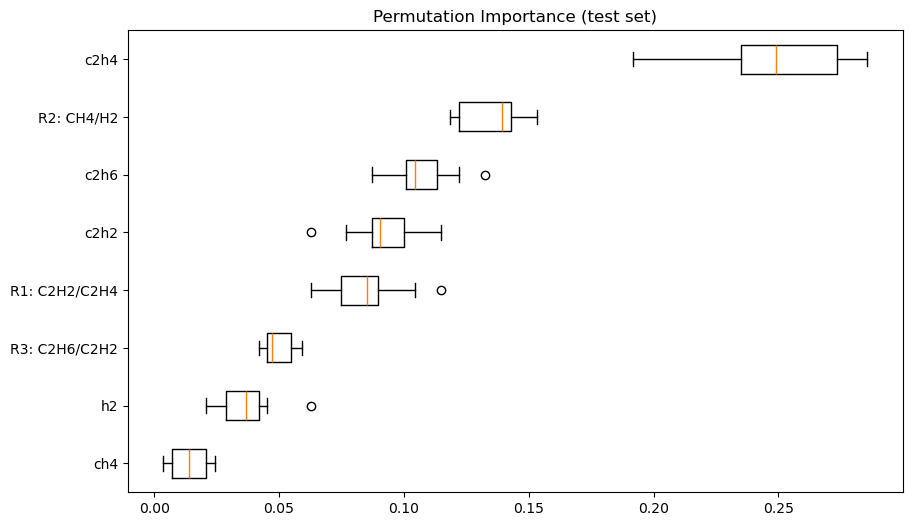

ch4: 0.0136
h2: 0.0373
R3: C2H6/C2H2: 0.0495
R1: C2H2/C2H4: 0.0854
c2h2: 0.0920
c2h6: 0.1066
R2: CH4/H2: 0.1355
c2h4: 0.2505


In [75]:
# 置换重要性
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb1, X_david_test, y_david_test, n_repeats=10, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_david_test.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.show()

for i in sorted_idx:
    print(f"{X_david_train.columns[i]}: {result.importances_mean[i]:.4f}")

## 随机森林 82.23%

Accuracy: 82.23%


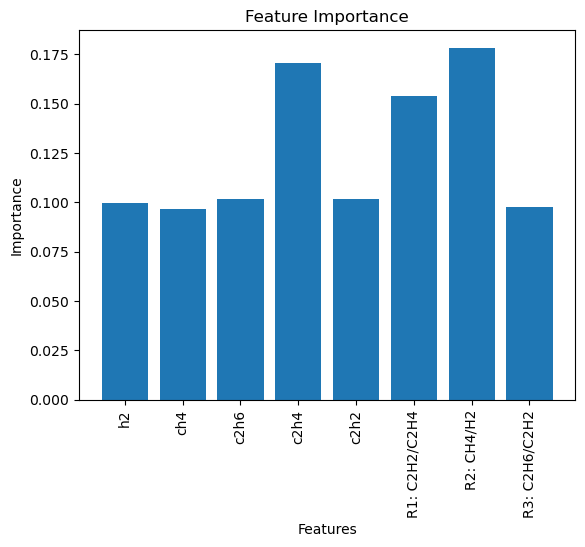

h2: 0.0997
ch4: 0.0965
c2h6: 0.1017
c2h4: 0.1707
c2h2: 0.1015
R1: C2H2/C2H4: 0.1539
R2: CH4/H2: 0.1783
R3: C2H6/C2H2: 0.0975


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 假设 X_david_train, y_david_train, X_david_test, y_david_test 已经定义

clf = RandomForestClassifier(max_depth=9, random_state=42)

clf.fit(X_david_train, y_david_train)

y_david_t = clf.predict(X_david_test)
accuracy = accuracy_score(y_david_t, y_david_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 获取特征重要性
importance = clf.feature_importances_

# 可视化特征重要性
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), X_david_train.columns, rotation='vertical')  # X_david_train.columns 是特征名称
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# 打印特征重要性
for i, feature in enumerate(X_david_train.columns):
    print(f"{feature}: {importance[i]:.4f}")

In [77]:
for i in range(1, 20):
    clf = RandomForestClassifier(max_depth=i, random_state=42)
    clf.fit(X_david_train, y_david_train)
    y_david_t = clf.predict(X_david_test)
    accuracy_david = accuracy_score(y_david_t, y_david_test)
    print("Depth: %d, Accuracy: %.2f%%" % (i, accuracy_david * 100.0))

Depth: 1, Accuracy: 45.99%
Depth: 2, Accuracy: 60.63%
Depth: 3, Accuracy: 68.29%
Depth: 4, Accuracy: 73.87%
Depth: 5, Accuracy: 77.35%
Depth: 6, Accuracy: 79.44%
Depth: 7, Accuracy: 80.49%
Depth: 8, Accuracy: 80.49%
Depth: 9, Accuracy: 82.23%
Depth: 10, Accuracy: 79.79%
Depth: 11, Accuracy: 80.84%
Depth: 12, Accuracy: 79.79%
Depth: 13, Accuracy: 80.14%
Depth: 14, Accuracy: 80.84%
Depth: 15, Accuracy: 80.84%
Depth: 16, Accuracy: 80.84%
Depth: 17, Accuracy: 80.14%
Depth: 18, Accuracy: 80.14%
Depth: 19, Accuracy: 79.44%
